In [1]:
import numpy as np
import os
from oe_acute import trial_utils as tu
from oe_acute import MNE
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import pickle
import tqdm
import glob

import sys
from oe_acute import pyMNE

In [2]:
os.nice(1)

2

### Load dsets

In [3]:
stim_spec = np.load('/mnt/cube/srrudrar/temporal_model/stim_resp_128/enc_train_128.npy')
stim_resp = np.load('/mnt/cube/srrudrar/temporal_model/stim_resp_128/resp_train_128.npy')

In [4]:
np.shape(stim_spec), np.shape(stim_resp)

((48855, 128), (48855, 214, 16))

In [5]:
def prepare_MNE_dset(stim_spec, stim_resp, nsegbins=16, concat=True):
    '''
    Create the dataset for fitting MNE model
    '''
    stim_mne = []
    resp_mne = []
    for s, r in zip(stim_spec, stim_resp):
        #nfreq, ntime = s.shape
        #s_segs = np.stack([s[:, n:(n+nsegbins)] for n in range(ntime - nsegbins)], axis=0)
        s_segs = s
        r_segs = np.sum(r, axis=1)
        stim_mne.append(s_segs)
        resp_mne.append(r_segs)
    if concat:
        return np.vstack(stim_mne), np.vstack(resp_mne)
    else:
        return stim_mne, resp_mne

In [6]:
nsegbins = 16

In [7]:
stim_mne = []
resp_mne = []
stim_mne, resp_mne = prepare_MNE_dset(stim_spec, stim_resp, nsegbins=nsegbins)

In [8]:
np.shape(stim_mne), np.shape(resp_mne)

((48855, 128), (48855, 214))

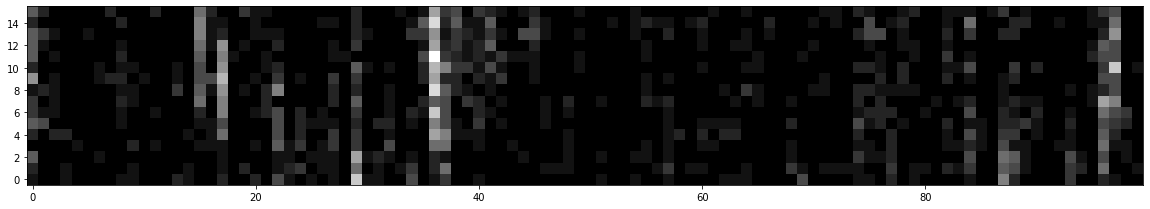

In [9]:
ax = plt.subplots(figsize=(20,8))
plt.imshow(np.transpose(stim_resp[:100, 100, :]), origin='lower', cmap='gray')

### Split into train test sets

In [10]:
len_units = np.shape(resp_mne)[1]

In [11]:
units_to_process = list(np.load('/mnt/cube/srrudrar/temporal_model/units_to_process.npy'))

In [12]:
exp_path = '/mnt/cube/srrudrar/temporal_model/stim_resp_128/'

In [13]:
# obtain all preprocessed datas

%matplotlib inline
sdim = 128
n_jackknives = 4

test_output_path = os.path.join(exp_path, 'MNE_test_dset')
os.makedirs(test_output_path, exist_ok=True)
n_eigvec_to_display = 6 # Number of most positive and most negative eigenvectors to display

pfinals = {}
for unit in units_to_process:
    i = units_to_process.index(unit)
    stims_train, resps_train, stims_test, resps_test = MNE.prepare_MNE_train_test_set(stim_mne, resp_mne[:,i][:,np.newaxis], train_pct=0.8, zscore=True, kz_norm_resp=True)
    
    # Save test dataset
    test_dict = {'stims_test':stims_test, 'resps_test':resps_test}
    out_fname = 'unit-{}_MNE.pkl'.format(unit)
    out_f = os.path.join(test_output_path, out_fname)
    with open(out_f, 'wb') as f:
        pickle.dump(test_dict, f)

    # Run MNE
    pfinal = MNE.fit_MNE(stims_train, resps_train, order=2)
    #MNE.plot_MNE(pfinal, unit, figure_output_path)
    pfinals[unit] = pfinal

Iters   tally   ll(test) 
    1       0    0.078406
    2       0    0.076709
    3       0    0.074758
    4       0    0.074266
    5       0    0.072655
    6       0    0.070618
    7       0    0.069433
    8       0    0.069128
    9       0    0.068607
   10       0    0.067533
   11       0    0.067780
   12       1    0.067554
   13       2    0.066593
   14       0    0.066395
   15       0    0.066478
   16       1    0.066368
   17       0    0.065740
   18       0    0.065659
   19       0    0.065455
   20       0    0.065678
   21       1    0.065652
   22       2    0.065010
   23       0    0.065013
   24       1    0.064998
   25       0    0.065224
   26       1    0.064957
   27       0    0.064854
   28       0    0.064838
   29       0    0.065022
   30       1    0.064918
   31       2    0.064743
   32       0    0.064713
   33       0    0.064635
   34       0    0.064658
   35       1    0.064690
   36       2    0.064567
   37       0    0.064527
   38       

   24       2    0.084936
   25       0    0.084704
   26       0    0.084634
   27       0    0.084424
   28       0    0.084147
   29       0    0.084091
   30       0    0.084225
   31       1    0.084178
   32       2    0.083941
   33       0    0.083974
   34       1    0.083966
   35       2    0.083761
   36       0    0.083680
   37       0    0.083446
   38       0    0.083389
   39       0    0.083372
   40       0    0.083365
   41       0    0.083305
   42       0    0.083389
   43       1    0.083308
   44       2    0.083155
   45       0    0.083313
   46       1    0.083444
   47       2    0.083894
   48       3    0.083940
   49       4    0.083692
   50       5    0.083670
   51       6    0.083729
   52       7    0.083709
   53       8    0.083739
   54       9    0.083745
minimum of test set found
Iters   tally   ll(test) 
    1       0    0.099177
    2       0    0.096027
    3       0    0.093216
    4       0    0.091422
    5       0    0.089800
    6       

   20       0    0.060090
   21       0    0.059934
   22       0    0.059885
   23       0    0.059867
   24       0    0.059856
   25       0    0.059782
   26       0    0.059733
   27       0    0.059682
   28       0    0.059594
   29       0    0.059551
   30       0    0.059482
   31       0    0.059455
   32       0    0.059475
   33       1    0.059496
   34       2    0.059472
   35       3    0.059439
   36       0    0.059481
   37       1    0.059497
   38       2    0.059386
   39       0    0.059257
   40       0    0.059251
   41       0    0.059242
   42       0    0.059245
   43       1    0.059220
   44       0    0.059178
   45       0    0.059185
   46       1    0.059217
   47       2    0.059257
   48       3    0.059204
   49       4    0.059208
   50       5    0.059253
   51       6    0.059339
   52       7    0.059405
   53       8    0.059424
   54       9    0.059324
minimum of test set found
Iters   tally   ll(test) 
    1       0    0.071370
    2       

   61       6    0.082231
   62       7    0.082272
   63       8    0.082331
   64       9    0.082335
minimum of test set found
Iters   tally   ll(test) 
    1       0    0.093347
    2       0    0.090999
    3       0    0.089924
    4       0    0.088732
    5       0    0.087440
    6       0    0.086805
    7       0    0.086216
    8       0    0.085011
    9       0    0.084638
   10       0    0.084127
   11       0    0.083394
   12       0    0.083275
   13       0    0.083097
   14       0    0.082627
   15       0    0.082438
   16       0    0.082150
   17       0    0.082040
   18       0    0.081953
   19       0    0.081909
   20       0    0.081773
   21       0    0.081503
   22       0    0.081240
   23       0    0.080820
   24       0    0.080779
   25       0    0.080639
   26       0    0.080630
   27       0    0.080619
   28       0    0.080523
   29       0    0.080429
   30       0    0.080365
   31       0    0.080351
   32       0    0.080332
   33       

   10       0    0.131697
   11       0    0.131078
   12       0    0.130403
   13       0    0.130296
   14       0    0.130331
   15       1    0.129408
   16       0    0.129180
   17       0    0.128981
   18       0    0.128755
   19       0    0.128600
   20       0    0.128363
   21       0    0.128326
   22       0    0.127924
   23       0    0.127685
   24       0    0.127630
   25       0    0.127644
   26       1    0.127502
   27       0    0.127423
   28       0    0.127393
   29       0    0.127333
   30       0    0.127290
   31       0    0.127277
   32       0    0.127301
   33       1    0.127373
   34       2    0.127202
   35       0    0.127160
   36       0    0.127153
   37       0    0.127061
   38       0    0.127028
   39       0    0.126987
   40       0    0.126920
   41       0    0.126861
   42       0    0.126862
   43       1    0.126881
   44       2    0.126839
   45       0    0.126717
   46       0    0.126622
   47       0    0.126608
   48       

   49       1    0.052645
   50       2    0.052675
   51       3    0.052619
   52       4    0.052649
   53       5    0.052598
   54       6    0.052629
   55       7    0.052782
   56       8    0.052907
   57       9    0.052849
minimum of test set found
Iters   tally   ll(test) 
    1       0    0.060265
    2       0    0.058195
    3       0    0.057618
    4       0    0.056694
    5       0    0.056014
    6       0    0.055353
    7       0    0.054674
    8       0    0.054440
    9       0    0.054163
   10       0    0.054089
   11       0    0.053946
   12       0    0.053883
   13       0    0.053638
   14       0    0.053560
   15       0    0.053495
   16       0    0.053148
   17       0    0.052935
   18       0    0.052840
   19       0    0.052695
   20       0    0.052672
   21       0    0.052610
   22       0    0.052485
   23       0    0.052359
   24       0    0.052240
   25       0    0.052012
   26       0    0.051904
   27       0    0.051831
   28       

   56       2    0.074564
   57       3    0.074479
   58       4    0.074470
   59       5    0.074618
   60       6    0.074862
   61       7    0.074873
   62       8    0.075193
   63       9    0.075400
minimum of test set found
Iters   tally   ll(test) 
    1       0    0.093304
    2       0    0.091539
    3       0    0.088985
    4       0    0.087317
    5       0    0.085865
    6       0    0.084226
    7       0    0.083468
    8       0    0.082503
    9       0    0.082113
   10       0    0.081670
   11       0    0.080863
   12       0    0.079810
   13       0    0.079456
   14       0    0.079144
   15       0    0.078507
   16       0    0.078379
   17       0    0.078237
   18       0    0.078194
   19       0    0.078071
   20       0    0.078029
   21       0    0.077860
   22       0    0.077293
   23       0    0.076797
   24       0    0.076507
   25       0    0.076432
   26       0    0.076344
   27       0    0.076413
   28       1    0.076352
   29       

   26       0    0.093221
   27       0    0.093149
   28       0    0.093002
   29       0    0.092950
   30       0    0.092897
   31       0    0.092908
   32       1    0.092886
   33       0    0.092766
   34       0    0.092784
   35       1    0.092747
   36       0    0.092577
   37       0    0.092556
   38       0    0.092590
   39       1    0.092560
   40       2    0.092496
   41       0    0.092566
   42       1    0.092557
   43       2    0.092662
   44       3    0.092429
   45       0    0.092485
   46       1    0.092575
   47       2    0.092455
   48       3    0.092522
   49       4    0.092395
   50       0    0.092420
   51       1    0.092349
   52       0    0.092300
   53       0    0.092368
   54       1    0.092356
   55       2    0.092270
   56       0    0.092282
   57       1    0.092333
   58       2    0.092302
   59       3    0.092326
   60       4    0.092379
   61       5    0.092304
   62       6    0.092262
   63       0    0.092355
   64       

   52       8    0.084305
   53       9    0.084359
minimum of test set found
Iters   tally   ll(test) 
    1       0    0.095571
    2       0    0.094110
    3       0    0.092498
    4       0    0.090533
    5       0    0.089874
    6       0    0.089013
    7       0    0.088571
    8       0    0.088367
    9       0    0.087436
   10       0    0.087269
   11       0    0.086812
   12       0    0.086737
   13       0    0.086460
   14       0    0.086311
   15       0    0.086222
   16       0    0.086220
   17       0    0.086069
   18       0    0.085826
   19       0    0.085804
   20       0    0.085575
   21       0    0.085408
   22       0    0.085141
   23       0    0.085067
   24       0    0.084916
   25       0    0.084865
   26       0    0.084782
   27       0    0.084729
   28       0    0.084754
   29       1    0.084691
   30       0    0.084625
   31       0    0.084562
   32       0    0.084545
   33       0    0.084466
   34       0    0.084416
   35       

   68       2    0.219943
   69       3    0.220269
   70       4    0.220410
   71       5    0.220508
   72       6    0.220632
   73       7    0.220574
   74       8    0.220605
   75       9    0.220589
minimum of test set found
Iters   tally   ll(test) 
    1       0    0.251562
    2       0    0.244876
    3       0    0.240424
    4       0    0.238856
    5       0    0.235737
    6       0    0.234404
    7       0    0.232761
    8       0    0.231323
    9       0    0.230917
   10       0    0.230018
   11       0    0.229678
   12       0    0.228833
   13       0    0.228538
   14       0    0.228391
   15       0    0.227747
   16       0    0.227398
   17       0    0.227111
   18       0    0.226485
   19       0    0.226152
   20       0    0.225467
   21       0    0.225271
   22       0    0.224960
   23       0    0.224695
   24       0    0.224530
   25       0    0.224422
   26       0    0.224257
   27       0    0.224184
   28       0    0.224203
   29       

   67       7    0.077849
   68       8    0.077843
   69       9    0.077871
minimum of test set found
Iters   tally   ll(test) 
    1       0    0.086669
    2       0    0.085040
    3       0    0.083277
    4       0    0.082594
    5       0    0.081926
    6       0    0.081569
    7       0    0.080840
    8       0    0.080484
    9       0    0.079810
   10       0    0.079320
   11       0    0.078905
   12       0    0.078573
   13       0    0.078450
   14       0    0.078075
   15       0    0.077900
   16       0    0.077790
   17       0    0.077501
   18       0    0.077422
   19       0    0.077153
   20       0    0.077081
   21       0    0.077000
   22       0    0.076940
   23       0    0.076927
   24       0    0.076906
   25       0    0.076910
   26       1    0.076866
   27       0    0.076709
   28       0    0.076635
   29       0    0.076587
   30       0    0.076600
   31       1    0.076634
   32       2    0.076442
   33       0    0.076409
   34       

    5       0    0.111780
    6       0    0.111218
    7       0    0.110535
    8       0    0.110317
    9       0    0.110149
   10       0    0.109889
   11       0    0.109416
   12       0    0.109352
   13       0    0.109055
   14       0    0.108732
   15       0    0.108574
   16       0    0.108428
   17       0    0.108275
   18       0    0.108207
   19       0    0.108066
   20       0    0.107834
   21       0    0.107515
   22       0    0.107460
   23       0    0.107460
   24       0    0.107414
   25       0    0.107357
   26       0    0.107328
   27       0    0.107377
   28       1    0.107429
   29       2    0.107442
   30       3    0.107261
   31       0    0.107199
   32       0    0.107080
   33       0    0.106945
   34       0    0.106907
   35       0    0.106849
   36       0    0.106811
   37       0    0.106789
   38       0    0.106796
   39       1    0.106765
   40       0    0.106759
   41       0    0.106770
   42       1    0.106771
   43       

   31       0    0.526672
   32       0    0.526615
   33       0    0.526558
   34       0    0.526556
   35       0    0.526556
   36       0    0.526477
   37       0    0.526445
   38       0    0.526417
   39       0    0.526347
   40       0    0.526267
   41       0    0.526175
   42       0    0.526132
   43       0    0.526086
   44       0    0.526084
   45       0    0.526085
   46       1    0.526078
   47       0    0.526070
   48       0    0.526094
   49       1    0.526021
   50       0    0.525952
   51       0    0.525952
   52       1    0.525970
   53       2    0.526018
   54       3    0.525892
   55       0    0.525820
   56       0    0.525831
   57       1    0.525824
   58       2    0.525796
   59       0    0.525803
   60       1    0.525857
   61       2    0.525830
   62       3    0.525840
   63       4    0.525940
   64       5    0.525956
   65       6    0.525865
   66       7    0.525868
   67       8    0.525873
   68       9    0.525854
minimum of t

  102       6    0.524754
  103       7    0.524788
  104       8    0.524768
  105       9    0.524772
minimum of test set found
Iters   tally   ll(test) 
    1       0    0.527812
    2       0    0.523193
    3       0    0.520421
    4       0    0.516996
    5       0    0.515424
    6       0    0.514062
    7       0    0.512453
    8       0    0.511411
    9       0    0.510902
   10       0    0.510371
   11       0    0.509486
   12       0    0.508897
   13       0    0.508722
   14       0    0.508088
   15       0    0.507834
   16       0    0.507671
   17       0    0.507572
   18       0    0.507439
   19       0    0.507071
   20       0    0.506594
   21       0    0.506185
   22       0    0.505905
   23       0    0.505553
   24       0    0.505162
   25       0    0.504998
   26       0    0.504897
   27       0    0.504867
   28       0    0.504611
   29       0    0.504169
   30       0    0.503604
   31       0    0.503061
   32       0    0.502813
   33       

   52       1    0.502588
   53       2    0.502596
   54       3    0.502619
   55       4    0.502538
   56       5    0.502608
   57       6    0.502619
   58       7    0.502421
   59       0    0.502350
   60       0    0.502365
   61       1    0.502248
   62       0    0.502172
   63       0    0.502161
   64       0    0.502158
   65       0    0.502107
   66       0    0.502018
   67       0    0.502021
   68       1    0.501959
   69       0    0.501917
   70       0    0.501951
   71       1    0.501927
   72       2    0.501850
   73       0    0.501906
   74       1    0.501923
   75       2    0.501989
   76       3    0.501926
   77       4    0.501871
   78       5    0.501884
   79       6    0.501885
   80       7    0.501853
   81       8    0.501841
   82       0    0.501843
   83       1    0.501782
   84       0    0.501776
   85       0    0.501805
   86       1    0.501750
   87       0    0.501723
   88       0    0.501756
   89       1    0.501771
   90       

   52       0    0.101762
   53       0    0.101772
   54       1    0.101799
   55       2    0.101763
   56       3    0.101740
   57       0    0.101786
   58       1    0.101749
   59       2    0.101744
   60       3    0.101813
   61       4    0.102046
   62       5    0.101940
   63       6    0.101914
   64       7    0.101841
   65       8    0.101918
   66       9    0.102102
minimum of test set found
Iters   tally   ll(test) 
    1       0    0.185057
    2       0    0.183202
    3       0    0.181730
    4       0    0.180315
    5       0    0.179847
    6       0    0.178384
    7       0    0.176727
    8       0    0.176315
    9       0    0.175386
   10       0    0.174980
   11       0    0.174808
   12       0    0.174557
   13       0    0.174203
   14       0    0.173420
   15       0    0.173411
   16       0    0.173110
   17       0    0.172741
   18       0    0.172621
   19       0    0.172434
   20       0    0.172048
   21       0    0.171953
   22       

   30       0    0.170159
   31       0    0.169904
   32       0    0.169925
   33       1    0.169922
   34       2    0.169868
   35       0    0.169882
   36       1    0.169834
   37       0    0.169780
   38       0    0.169768
   39       0    0.169754
   40       0    0.169693
   41       0    0.169694
   42       1    0.169777
   43       2    0.169697
   44       3    0.169464
   45       0    0.169321
   46       0    0.169349
   47       1    0.169410
   48       2    0.169473
   49       3    0.169275
   50       0    0.169173
   51       0    0.169174
   52       1    0.169242
   53       2    0.169247
   54       3    0.169104
   55       0    0.169080
   56       0    0.169140
   57       1    0.169114
   58       2    0.169042
   59       0    0.169071
   60       1    0.169076
   61       2    0.169044
   62       3    0.169305
   63       4    0.169400
   64       5    0.169347
   65       6    0.169074
   66       7    0.169021
   67       0    0.169042
   68       

   79       9    0.358803
minimum of test set found
Iters   tally   ll(test) 
    1       0    0.386369
    2       0    0.383708
    3       0    0.380377
    4       0    0.379035
    5       0    0.377557
    6       0    0.376005
    7       0    0.375309
    8       0    0.374277
    9       0    0.373759
   10       0    0.373191
   11       0    0.372273
   12       0    0.371325
   13       0    0.370388
   14       0    0.369556
   15       0    0.369073
   16       0    0.369202
   17       1    0.368479
   18       0    0.368285
   19       0    0.368130
   20       0    0.367707
   21       0    0.367154
   22       0    0.366923
   23       0    0.366611
   24       0    0.366368
   25       0    0.366141
   26       0    0.366004
   27       0    0.365927
   28       0    0.365871
   29       0    0.365861
   30       0    0.365829
   31       0    0.365535
   32       0    0.365243
   33       0    0.364851
   34       0    0.364725
   35       0    0.364639
   36       

   18       0    0.168738
   19       0    0.168432
   20       0    0.168392
   21       0    0.167690
   22       0    0.167261
   23       0    0.167171
   24       0    0.167053
   25       0    0.167075
   26       1    0.166907
   27       0    0.166976
   28       1    0.167106
   29       2    0.166935
   30       3    0.166798
   31       0    0.166698
   32       0    0.166696
   33       0    0.166532
   34       0    0.166436
   35       0    0.166412
   36       0    0.166454
   37       1    0.166434
   38       2    0.166324
   39       0    0.166323
   40       0    0.166240
   41       0    0.166306
   42       1    0.166359
   43       2    0.166221
   44       0    0.166206
   45       0    0.166051
   46       0    0.165933
   47       0    0.165976
   48       1    0.165975
   49       2    0.165920
   50       0    0.165955
   51       1    0.166000
   52       2    0.165951
   53       3    0.165920
   54       4    0.166045
   55       5    0.166026
   56       

    5       0    0.035494
    6       0    0.034902
    7       0    0.034667
    8       0    0.033846
    9       0    0.033365
   10       0    0.033225
   11       0    0.032808
   12       0    0.032425
   13       0    0.032400
   14       0    0.033484
   15       1    0.034301
   16       2    0.033313
   17       3    0.032915
   18       4    0.032208
   19       0    0.031723
   20       0    0.031588
   21       0    0.031483
   22       0    0.031698
   23       1    0.031822
   24       2    0.031585
   25       3    0.031809
   26       4    0.031731
   27       5    0.031564
   28       6    0.031638
   29       7    0.031983
   30       8    0.032022
   31       9    0.031991
minimum of test set found
Iters   tally   ll(test) 
    1       0    0.042328
    2       0    0.041356
    3       0    0.041141
    4       0    0.040273
    5       0    0.039277
    6       0    0.039243
    7       0    0.038474
    8       0    0.038426
    9       0    0.038872
   10       

    8       0    0.056539
    9       0    0.056223
   10       0    0.055734
   11       0    0.055254
   12       0    0.054892
   13       0    0.054829
   14       0    0.054591
   15       0    0.054178
   16       0    0.054149
   17       0    0.054019
   18       0    0.053958
   19       0    0.053902
   20       0    0.053593
   21       0    0.053206
   22       0    0.053069
   23       0    0.052849
   24       0    0.052578
   25       0    0.052593
   26       1    0.052500
   27       0    0.052493
   28       0    0.052476
   29       0    0.052338
   30       0    0.052202
   31       0    0.052213
   32       1    0.052140
   33       0    0.052110
   34       0    0.052164
   35       1    0.052193
   36       2    0.052090
   37       0    0.051999
   38       0    0.051995
   39       0    0.051978
   40       0    0.051909
   41       0    0.051869
   42       0    0.051864
   43       0    0.051733
   44       0    0.051714
   45       0    0.051641
   46       

   78       1    0.498362
   79       2    0.498339
   80       3    0.498545
   81       4    0.498666
   82       5    0.498335
   83       6    0.498440
   84       7    0.498447
   85       8    0.498220
   86       0    0.498492
   87       1    0.498677
   88       2    0.498534
   89       3    0.498410
   90       4    0.498450
   91       5    0.498530
   92       6    0.498455
   93       7    0.498386
   94       8    0.498443
   95       9    0.498409
minimum of test set found
Iters   tally   ll(test) 
    1       0    0.535006
    2       0    0.528661
    3       0    0.525888
    4       0    0.524748
    5       0    0.520128
    6       0    0.518979
    7       0    0.517813
    8       0    0.516993
    9       0    0.515763
   10       0    0.514817
   11       0    0.514233
   12       0    0.511875
   13       0    0.510788
   14       0    0.510102
   15       0    0.509466
   16       0    0.508948
   17       0    0.508407
   18       0    0.507920
   19       

   20       0    0.088301
   21       0    0.088243
   22       0    0.088183
   23       0    0.088242
   24       1    0.088270
   25       2    0.088118
   26       0    0.088056
   27       0    0.087977
   28       0    0.088036
   29       1    0.088098
   30       2    0.088027
   31       3    0.088098
   32       4    0.088131
   33       5    0.087925
   34       0    0.087866
   35       0    0.087872
   36       1    0.087804
   37       0    0.087768
   38       0    0.087766
   39       0    0.087813
   40       1    0.087810
   41       2    0.087795
   42       3    0.087820
   43       4    0.087793
   44       5    0.087756
   45       0    0.087791
   46       1    0.087994
   47       2    0.087937
   48       3    0.087893
   49       4    0.088030
   50       5    0.088059
   51       6    0.088019
   52       7    0.087965
   53       8    0.087963
   54       9    0.087944
minimum of test set found
Iters   tally   ll(test) 
    1       0    0.029850
    2       

   43       0    0.024864
   44       0    0.024852
   45       0    0.024873
   46       1    0.024871
   47       2    0.024889
   48       3    0.024973
   49       4    0.024924
   50       5    0.024901
   51       6    0.024871
   52       7    0.024841
   53       0    0.024792
   54       0    0.024828
   55       1    0.024776
   56       0    0.024725
   57       0    0.024735
   58       1    0.024737
   59       2    0.024770
   60       3    0.024825
   61       4    0.024792
   62       5    0.024746
   63       6    0.024741
   64       7    0.024716
   65       0    0.024694
   66       0    0.024672
   67       0    0.024703
   68       1    0.024722
   69       2    0.024683
   70       3    0.024661
   71       0    0.024672
   72       1    0.024689
   73       2    0.024685
   74       3    0.024719
   75       4    0.024711
   76       5    0.024751
   77       6    0.024815
   78       7    0.024868
   79       8    0.024817
   80       9    0.024741
minimum of t

   16       0    0.207115
   17       0    0.206578
   18       0    0.206442
   19       0    0.206064
   20       0    0.205655
   21       0    0.205341
   22       0    0.205008
   23       0    0.204923
   24       0    0.205000
   25       1    0.204761
   26       0    0.204607
   27       0    0.204475
   28       0    0.204358
   29       0    0.204194
   30       0    0.204092
   31       0    0.204048
   32       0    0.203987
   33       0    0.203856
   34       0    0.203661
   35       0    0.203668
   36       1    0.203705
   37       2    0.203634
   38       0    0.203544
   39       0    0.203558
   40       1    0.203566
   41       2    0.203527
   42       0    0.203489
   43       0    0.203529
   44       1    0.203543
   45       2    0.203443
   46       0    0.203399
   47       0    0.203445
   48       1    0.203500
   49       2    0.203720
   50       3    0.203738
   51       4    0.204048
   52       5    0.204043
   53       6    0.203975
   54       

   25       0    0.177113
   26       0    0.176961
   27       0    0.176664
   28       0    0.176388
   29       0    0.176256
   30       0    0.176221
   31       0    0.176114
   32       0    0.176131
   33       1    0.176019
   34       0    0.175908
   35       0    0.175840
   36       0    0.175891
   37       1    0.175807
   38       0    0.175766
   39       0    0.175752
   40       0    0.175682
   41       0    0.175671
   42       0    0.175702
   43       1    0.175578
   44       0    0.175492
   45       0    0.175443
   46       0    0.175456
   47       1    0.175436
   48       0    0.175407
   49       0    0.175399
   50       0    0.175381
   51       0    0.175354
   52       0    0.175393
   53       1    0.175533
   54       2    0.175470
   55       3    0.175392
   56       4    0.175365
   57       5    0.175620
   58       6    0.175833
   59       7    0.175779
   60       8    0.175945
   61       9    0.176019
minimum of test set found
Iters   tall

   21       0    0.297566
   22       0    0.296986
   23       0    0.296479
   24       0    0.296497
   25       1    0.296502
   26       2    0.296074
   27       0    0.295979
   28       0    0.295772
   29       0    0.295711
   30       0    0.295665
   31       0    0.295615
   32       0    0.295554
   33       0    0.295453
   34       0    0.295474
   35       1    0.295425
   36       0    0.295360
   37       0    0.295293
   38       0    0.295266
   39       0    0.295175
   40       0    0.295006
   41       0    0.294889
   42       0    0.294894
   43       1    0.294847
   44       0    0.294769
   45       0    0.294754
   46       0    0.294681
   47       0    0.294529
   48       0    0.294437
   49       0    0.294358
   50       0    0.294190
   51       0    0.294131
   52       0    0.294116
   53       0    0.294024
   54       0    0.293984
   55       0    0.294035
   56       1    0.294008
   57       2    0.293967
   58       0    0.293984
   59       

   26       0    0.043200
   27       1    0.043114
   28       0    0.043063
   29       0    0.043078
   30       1    0.042835
   31       0    0.042746
   32       0    0.042722
   33       0    0.042735
   34       1    0.042774
   35       2    0.042741
   36       3    0.042751
   37       4    0.042715
   38       0    0.042637
   39       0    0.042603
   40       0    0.042591
   41       0    0.042565
   42       0    0.042591
   43       1    0.042602
   44       2    0.042559
   45       0    0.042560
   46       1    0.042538
   47       0    0.042501
   48       0    0.042515
   49       1    0.042516
   50       2    0.042495
   51       0    0.042494
   52       0    0.042512
   53       1    0.042509
   54       2    0.042537
   55       3    0.042557
   56       4    0.042558
   57       5    0.042477
   58       0    0.042447
   59       0    0.042481
   60       1    0.042499
   61       2    0.042508
   62       3    0.042477
   63       4    0.042494
   64       

   69       3    0.085189
   70       4    0.085192
   71       5    0.085178
   72       6    0.085216
   73       7    0.085232
   74       8    0.085240
   75       9    0.085231
minimum of test set found
Iters   tally   ll(test) 
    1       0    0.096413
    2       0    0.095272
    3       0    0.094135
    4       0    0.093193
    5       0    0.092181
    6       0    0.091877
    7       0    0.091710
    8       0    0.090686
    9       0    0.090279
   10       0    0.089831
   11       0    0.089667
   12       0    0.089439
   13       0    0.089013
   14       0    0.088629
   15       0    0.088546
   16       0    0.088380
   17       0    0.088396
   18       1    0.088275
   19       0    0.088003
   20       0    0.087853
   21       0    0.087787
   22       0    0.087643
   23       0    0.087621
   24       0    0.087599
   25       0    0.087627
   26       1    0.087629
   27       2    0.087454
   28       0    0.087387
   29       0    0.086995
   30       

    4       0    0.096817
    5       0    0.095045
    6       0    0.093085
    7       0    0.092795
    8       0    0.092314
    9       0    0.091953
   10       0    0.091636
   11       0    0.091540
   12       0    0.091406
   13       0    0.090469
   14       0    0.090203
   15       0    0.089840
   16       0    0.089807
   17       0    0.089273
   18       0    0.089283
   19       1    0.089532
   20       2    0.089447
   21       3    0.089078
   22       0    0.089180
   23       1    0.089056
   24       0    0.088870
   25       0    0.088894
   26       1    0.088888
   27       2    0.088827
   28       0    0.088844
   29       1    0.088619
   30       0    0.088505
   31       0    0.088463
   32       0    0.088357
   33       0    0.088239
   34       0    0.088193
   35       0    0.088206
   36       1    0.088185
   37       0    0.088124
   38       0    0.088114
   39       0    0.088091
   40       0    0.087995
   41       0    0.087955
   42       

   17       0    0.149588
   18       1    0.149208
   19       0    0.148843
   20       0    0.148704
   21       0    0.148625
   22       0    0.148490
   23       0    0.148260
   24       0    0.147758
   25       0    0.147504
   26       0    0.147154
   27       0    0.146962
   28       0    0.146730
   29       0    0.146598
   30       0    0.146478
   31       0    0.146386
   32       0    0.146275
   33       0    0.146210
   34       0    0.146228
   35       1    0.146202
   36       0    0.146232
   37       1    0.146162
   38       0    0.146068
   39       0    0.145961
   40       0    0.145987
   41       1    0.145983
   42       2    0.145938
   43       0    0.145869
   44       0    0.145756
   45       0    0.145713
   46       0    0.145629
   47       0    0.145458
   48       0    0.145595
   49       1    0.145459
   50       2    0.145325
   51       0    0.145239
   52       0    0.145266
   53       1    0.145226
   54       0    0.145207
   55       

    5       0    0.497583
    6       0    0.496483
    7       0    0.495364
    8       0    0.494917
    9       0    0.494064
   10       0    0.491751
   11       0    0.490255
   12       0    0.488533
   13       0    0.488099
   14       0    0.487663
   15       0    0.487202
   16       0    0.487184
   17       0    0.486565
   18       0    0.485527
   19       0    0.484735
   20       0    0.484498
   21       0    0.484188
   22       0    0.483840
   23       0    0.483462
   24       0    0.482929
   25       0    0.482881
   26       0    0.482939
   27       1    0.482492
   28       0    0.482358
   29       0    0.482221
   30       0    0.482323
   31       1    0.482072
   32       0    0.481794
   33       0    0.481591
   34       0    0.481624
   35       1    0.481606
   36       2    0.481328
   37       0    0.481098
   38       0    0.481096
   39       0    0.481166
   40       1    0.481035
   41       0    0.480815
   42       0    0.481020
   43       

   43       0    0.112412
   44       0    0.112341
   45       0    0.112335
   46       0    0.112284
   47       0    0.112237
   48       0    0.112190
   49       0    0.112193
   50       1    0.112254
   51       2    0.112306
   52       3    0.112241
   53       4    0.112272
   54       5    0.112368
   55       6    0.112538
   56       7    0.112537
   57       8    0.112545
   58       9    0.112605
minimum of test set found
Iters   tally   ll(test) 
    1       0    0.121651
    2       0    0.120262
    3       0    0.119536
    4       0    0.119068
    5       0    0.118384
    6       0    0.118151
    7       0    0.117575
    8       0    0.116896
    9       0    0.116672
   10       0    0.116565
   11       0    0.116266
   12       0    0.116030
   13       0    0.115953
   14       0    0.115838
   15       0    0.115570
   16       0    0.115176
   17       0    0.114791
   18       0    0.114667
   19       0    0.114636
   20       0    0.114628
   21       

   53       7    0.076393
   54       8    0.076388
   55       9    0.076406
minimum of test set found
Iters   tally   ll(test) 
    1       0    0.084469
    2       0    0.082589
    3       0    0.081463
    4       0    0.080949
    5       0    0.080038
    6       0    0.079575
    7       0    0.079083
    8       0    0.078183
    9       0    0.077918
   10       0    0.077833
   11       0    0.077717
   12       0    0.077132
   13       0    0.076379
   14       0    0.076187
   15       0    0.076107
   16       0    0.075942
   17       0    0.075827
   18       0    0.075822
   19       0    0.075729
   20       0    0.075548
   21       0    0.075418
   22       0    0.075437
   23       1    0.075065
   24       0    0.075050
   25       0    0.075078
   26       1    0.075085
   27       2    0.074956
   28       0    0.074945
   29       0    0.074870
   30       0    0.074870
   31       1    0.074971
   32       2    0.074928
   33       3    0.074971
   34       

   59       1    0.613025
   60       0    0.613045
   61       1    0.613043
   62       2    0.613077
   63       3    0.613113
   64       4    0.612984
   65       0    0.612951
   66       0    0.612922
   67       0    0.612896
   68       0    0.612909
   69       1    0.612899
   70       2    0.612877
   71       0    0.612868
   72       0    0.612876
   73       1    0.612880
   74       2    0.612908
   75       3    0.612932
   76       4    0.612995
   77       5    0.613015
   78       6    0.613025
   79       7    0.613019
   80       8    0.613014
   81       9    0.612986
minimum of test set found
Iters   tally   ll(test) 
    1       0    0.628537
    2       0    0.625899
    3       0    0.623927
    4       0    0.622621
    5       0    0.621909
    6       0    0.621087
    7       0    0.620522
    8       0    0.618962
    9       0    0.617458
   10       0    0.617022
   11       0    0.616520
   12       0    0.616014
   13       0    0.615829
   14       

   38       0    0.058527
   39       0    0.058430
   40       0    0.058434
   41       1    0.058478
   42       2    0.058464
   43       3    0.058422
   44       0    0.058427
   45       1    0.058443
   46       2    0.058432
   47       3    0.058382
   48       0    0.058371
   49       0    0.058395
   50       1    0.058457
   51       2    0.058382
   52       3    0.058366
   53       0    0.058433
   54       1    0.058532
   55       2    0.058501
   56       3    0.058647
   57       4    0.058675
   58       5    0.058573
   59       6    0.058560
   60       7    0.058524
   61       8    0.058496
   62       9    0.058505
minimum of test set found
Iters   tally   ll(test) 
    1       0    0.067372
    2       0    0.065162
    3       0    0.063092
    4       0    0.062396
    5       0    0.061103
    6       0    0.060505
    7       0    0.060163
    8       0    0.059697
    9       0    0.059483
   10       0    0.058915
   11       0    0.058763
   12       

   78       9    0.501037
minimum of test set found
Iters   tally   ll(test) 
    1       0    0.526583
    2       0    0.520011
    3       0    0.516133
    4       0    0.514335
    5       0    0.513066
    6       0    0.512482
    7       0    0.510707
    8       0    0.509220
    9       0    0.508144
   10       0    0.507011
   11       0    0.505951
   12       0    0.505505
   13       0    0.504970
   14       0    0.504198
   15       0    0.503658
   16       0    0.502734
   17       0    0.501513
   18       0    0.500314
   19       0    0.499879
   20       0    0.499673
   21       0    0.499399
   22       0    0.499075
   23       0    0.498915
   24       0    0.498711
   25       0    0.498479
   26       0    0.497748
   27       0    0.497471
   28       0    0.497017
   29       0    0.496615
   30       0    0.496258
   31       0    0.495984
   32       0    0.495869
   33       0    0.495829
   34       0    0.496137
   35       1    0.496154
   36       

   22       0    0.126132
   23       0    0.126206
   24       1    0.126004
   25       0    0.125772
   26       0    0.125255
   27       0    0.125139
   28       0    0.124754
   29       0    0.124794
   30       1    0.124356
   31       0    0.124446
   32       1    0.124233
   33       0    0.123823
   34       0    0.123891
   35       1    0.123713
   36       0    0.123526
   37       0    0.123362
   38       0    0.123216
   39       0    0.123376
   40       1    0.123300
   41       2    0.123044
   42       0    0.123063
   43       1    0.123122
   44       2    0.123048
   45       3    0.122864
   46       0    0.122970
   47       1    0.122852
   48       0    0.122820
   49       0    0.122962
   50       1    0.122699
   51       0    0.122913
   52       1    0.122768
   53       2    0.122831
   54       3    0.122874
   55       4    0.123256
   56       5    0.122988
   57       6    0.122988
   58       7    0.122865
   59       8    0.122682
   60       

    3       0    0.100246
    4       0    0.098928
    5       0    0.097063
    6       0    0.096364
    7       0    0.095415
    8       0    0.093608
    9       0    0.093317
   10       0    0.092752
   11       0    0.092441
   12       0    0.092331
   13       0    0.091761
   14       0    0.090935
   15       0    0.090178
   16       0    0.090039
   17       0    0.089321
   18       0    0.089496
   19       1    0.089292
   20       0    0.089465
   21       1    0.089184
   22       0    0.089188
   23       1    0.089078
   24       0    0.089056
   25       0    0.088767
   26       0    0.088731
   27       0    0.088490
   28       0    0.088465
   29       0    0.088378
   30       0    0.088223
   31       0    0.088235
   32       1    0.088063
   33       0    0.087850
   34       0    0.087757
   35       0    0.087624
   36       0    0.087602
   37       0    0.087600
   38       0    0.087539
   39       0    0.087464
   40       0    0.087454
   41       

   19       0    0.102434
   20       1    0.102352
   21       0    0.102047
   22       0    0.101881
   23       0    0.101604
   24       0    0.101798
   25       1    0.101976
   26       2    0.101392
   27       0    0.101031
   28       0    0.101250
   29       1    0.101213
   30       2    0.100966
   31       0    0.100853
   32       0    0.100686
   33       0    0.100671
   34       0    0.100338
   35       0    0.100374
   36       1    0.100367
   37       2    0.100505
   38       3    0.100356
   39       4    0.100358
   40       5    0.100316
   41       0    0.100260
   42       0    0.100288
   43       1    0.100267
   44       2    0.100223
   45       0    0.100219
   46       0    0.100226
   47       1    0.100190
   48       0    0.100244
   49       1    0.100185
   50       0    0.099943
   51       0    0.100034
   52       1    0.100337
   53       2    0.100365
   54       3    0.100028
   55       4    0.100175
   56       5    0.100213
   57       

   33       1    0.084720
   34       2    0.084428
   35       0    0.084425
   36       0    0.084354
   37       0    0.084319
   38       0    0.084319
   39       0    0.084218
   40       0    0.084183
   41       0    0.084273
   42       1    0.084295
   43       2    0.084186
   44       3    0.084180
   45       0    0.084207
   46       1    0.084139
   47       0    0.084156
   48       1    0.084171
   49       2    0.084081
   50       0    0.084115
   51       1    0.084273
   52       2    0.084344
   53       3    0.084141
   54       4    0.084081
   55       5    0.084098
   56       6    0.084062
   57       0    0.084071
   58       1    0.084075
   59       2    0.084036
   60       0    0.084066
   61       1    0.084203
   62       2    0.084266
   63       3    0.084104
   64       4    0.084019
   65       0    0.084057
   66       1    0.084033
   67       2    0.084102
   68       3    0.084105
   69       4    0.084051
   70       5    0.084081
   71       

   91       0    0.346047
   92       1    0.346092
   93       2    0.346127
   94       3    0.346226
   95       4    0.346282
   96       5    0.346535
   97       6    0.346499
   98       7    0.346381
   99       8    0.346389
  100       9    0.346373
minimum of test set found
Iters   tally   ll(test) 
    1       0    0.374347
    2       0    0.370444
    3       0    0.365911
    4       0    0.364152
    5       0    0.362979
    6       0    0.361332
    7       0    0.359399
    8       0    0.358194
    9       0    0.357777
   10       0    0.357127
   11       0    0.356553
   12       0    0.355731
   13       0    0.355319
   14       0    0.354641
   15       0    0.354080
   16       0    0.353632
   17       0    0.353537
   18       0    0.353374
   19       0    0.353106
   20       0    0.353025
   21       0    0.352561
   22       0    0.352113
   23       0    0.351719
   24       0    0.351357
   25       0    0.351040
   26       0    0.350672
   27       

   12       0    0.358315
   13       0    0.357889
   14       0    0.357667
   15       0    0.357531
   16       0    0.357543
   17       1    0.357324
   18       0    0.356787
   19       0    0.355829
   20       0    0.355552
   21       0    0.355263
   22       0    0.354855
   23       0    0.354341
   24       0    0.354253
   25       0    0.354183
   26       0    0.354141
   27       0    0.354045
   28       0    0.353991
   29       0    0.353757
   30       0    0.353652
   31       0    0.353558
   32       0    0.353511
   33       0    0.353434
   34       0    0.353336
   35       0    0.353569
   36       1    0.353686
   37       2    0.353282
   38       0    0.353078
   39       0    0.352902
   40       0    0.352586
   41       0    0.352442
   42       0    0.352380
   43       0    0.352328
   44       0    0.352306
   45       0    0.352287
   46       0    0.352316
   47       1    0.352349
   48       2    0.352352
   49       3    0.352352
   50       

   23       0    0.560636
   24       0    0.560562
   25       0    0.560433
   26       0    0.560305
   27       0    0.559925
   28       0    0.559802
   29       0    0.559740
   30       0    0.559572
   31       0    0.559409
   32       0    0.559277
   33       0    0.559166
   34       0    0.559042
   35       0    0.559030
   36       0    0.558986
   37       0    0.558948
   38       0    0.558958
   39       1    0.559027
   40       2    0.558970
   41       3    0.558957
   42       4    0.558838
   43       0    0.558740
   44       0    0.558589
   45       0    0.558578
   46       0    0.558524
   47       0    0.558476
   48       0    0.558433
   49       0    0.558396
   50       0    0.558355
   51       0    0.558282
   52       0    0.558278
   53       0    0.558236
   54       0    0.558203
   55       0    0.558189
   56       0    0.558192
   57       1    0.558212
   58       2    0.558181
   59       0    0.558157
   60       0    0.558171
   61       

   61       9    0.557847
minimum of test set found
Iters   tally   ll(test) 
    1       0    0.102694
    2       0    0.100071
    3       0    0.098172
    4       0    0.097064
    5       0    0.096264
    6       0    0.095505
    7       0    0.094841
    8       0    0.094512
    9       0    0.094457
   10       0    0.094188
   11       0    0.093552
   12       0    0.093394
   13       0    0.093204
   14       0    0.093008
   15       0    0.093075
   16       1    0.092938
   17       0    0.092643
   18       0    0.092485
   19       0    0.092302
   20       0    0.092291
   21       0    0.092355
   22       1    0.091881
   23       0    0.091774
   24       0    0.091630
   25       0    0.091770
   26       1    0.091624
   27       0    0.091386
   28       0    0.091325
   29       0    0.091333
   30       1    0.091267
   31       0    0.091201
   32       0    0.091165
   33       0    0.091119
   34       0    0.090979
   35       0    0.090940
   36       

   65       2    0.438305
   66       0    0.438241
   67       0    0.438189
   68       0    0.438196
   69       1    0.438241
   70       2    0.438206
   71       3    0.438145
   72       0    0.438097
   73       0    0.438047
   74       0    0.438061
   75       1    0.438071
   76       2    0.438070
   77       3    0.438111
   78       4    0.438161
   79       5    0.438084
   80       6    0.437993
   81       0    0.437952
   82       0    0.437906
   83       0    0.437893
   84       0    0.437873
   85       0    0.437813
   86       0    0.437825
   87       1    0.437842
   88       2    0.437795
   89       0    0.437762
   90       0    0.437769
   91       1    0.437783
   92       2    0.437768
   93       3    0.437763
   94       4    0.437780
   95       5    0.437747
   96       0    0.437793
   97       1    0.437824
   98       2    0.437768
   99       3    0.437665
  100       0    0.437647
  101       0    0.437645
  102       0    0.437645
  103       

   48       0    0.444973
   49       0    0.445044
   50       1    0.445072
   51       2    0.445066
   52       3    0.444795
   53       0    0.444612
   54       0    0.444399
   55       0    0.444308
   56       0    0.444355
   57       1    0.444314
   58       2    0.444277
   59       0    0.444179
   60       0    0.444288
   61       1    0.444296
   62       2    0.444402
   63       3    0.444205
   64       4    0.444187
   65       5    0.444143
   66       0    0.444075
   67       0    0.444117
   68       1    0.444080
   69       2    0.443906
   70       0    0.443934
   71       1    0.443894
   72       0    0.443820
   73       0    0.443791
   74       0    0.443835
   75       1    0.443815
   76       2    0.443753
   77       0    0.443763
   78       1    0.443741
   79       0    0.443792
   80       1    0.443813
   81       2    0.443788
   82       3    0.443801
   83       4    0.443771
   84       5    0.443764
   85       6    0.443740
   86       

   79       3    0.295619
   80       4    0.295675
   81       5    0.295679
   82       6    0.295789
   83       7    0.295648
   84       8    0.295605
   85       9    0.295554
minimum of test set found
Iters   tally   ll(test) 
    1       0    0.312977
    2       0    0.310698
    3       0    0.306689
    4       0    0.305146
    5       0    0.303823
    6       0    0.301925
    7       0    0.300605
    8       0    0.300381
    9       0    0.298869
   10       0    0.298472
   11       0    0.297521
   12       0    0.297123
   13       0    0.296696
   14       0    0.296355
   15       0    0.295627
   16       0    0.295182
   17       0    0.294743
   18       0    0.294361
   19       0    0.293997
   20       0    0.293694
   21       0    0.293440
   22       0    0.293211
   23       0    0.293056
   24       0    0.293002
   25       0    0.292727
   26       0    0.292444
   27       0    0.292181
   28       0    0.292070
   29       0    0.291897
   30       

   17       0    0.021536
   18       0    0.021464
   19       0    0.021480
   20       1    0.021457
   21       0    0.021388
   22       0    0.021385
   23       0    0.021361
   24       0    0.021319
   25       0    0.021321
   26       1    0.021320
   27       2    0.021312
   28       0    0.021275
   29       0    0.021269
   30       0    0.021306
   31       1    0.021308
   32       2    0.021272
   33       3    0.021244
   34       0    0.021174
   35       0    0.021169
   36       0    0.021156
   37       0    0.021144
   38       0    0.021118
   39       0    0.021110
   40       0    0.021113
   41       1    0.021101
   42       0    0.021095
   43       0    0.021108
   44       1    0.021099
   45       2    0.021083
   46       0    0.021098
   47       1    0.021098
   48       2    0.021070
   49       0    0.021065
   50       0    0.021047
   51       0    0.021035
   52       0    0.021040
   53       1    0.021029
   54       0    0.021023
   55       

   15       0    0.120088
   16       0    0.119874
   17       0    0.119804
   18       0    0.119710
   19       0    0.119646
   20       0    0.119632
   21       0    0.119410
   22       0    0.119411
   23       1    0.119681
   24       2    0.119320
   25       0    0.119215
   26       0    0.119007
   27       0    0.118892
   28       0    0.118823
   29       0    0.118550
   30       0    0.118502
   31       0    0.118422
   32       0    0.118356
   33       0    0.118238
   34       0    0.118173
   35       0    0.118174
   36       1    0.118110
   37       0    0.118083
   38       0    0.118044
   39       0    0.117972
   40       0    0.117902
   41       0    0.117855
   42       0    0.117887
   43       1    0.117900
   44       2    0.117897
   45       3    0.117922
   46       4    0.117815
   47       0    0.117765
   48       0    0.117617
   49       0    0.117640
   50       1    0.117607
   51       0    0.117638
   52       1    0.117614
   53       

   46       6    0.406100
   47       0    0.405790
   48       0    0.405696
   49       0    0.405745
   50       1    0.405541
   51       0    0.405331
   52       0    0.405192
   53       0    0.405173
   54       0    0.405149
   55       0    0.404963
   56       0    0.404868
   57       0    0.404767
   58       0    0.404710
   59       0    0.404688
   60       0    0.404673
   61       0    0.404772
   62       1    0.404755
   63       2    0.404755
   64       3    0.404724
   65       4    0.404750
   66       5    0.404782
   67       6    0.404890
   68       7    0.405109
   69       8    0.404909
   70       9    0.404744
minimum of test set found
Iters   tally   ll(test) 
    1       0    0.442675
    2       0    0.435011
    3       0    0.429772
    4       0    0.427512
    5       0    0.424473
    6       0    0.422661
    7       0    0.421460
    8       0    0.420285
    9       0    0.416873
   10       0    0.416370
   11       0    0.414977
   12       

   24       0    0.233154
   25       0    0.232891
   26       0    0.232661
   27       0    0.232140
   28       0    0.231598
   29       0    0.231449
   30       0    0.231336
   31       0    0.231249
   32       0    0.231149
   33       0    0.231138
   34       0    0.231115
   35       0    0.231068
   36       0    0.230959
   37       0    0.230885
   38       0    0.230855
   39       0    0.230812
   40       0    0.230753
   41       0    0.230707
   42       0    0.230698
   43       0    0.230646
   44       0    0.230524
   45       0    0.230430
   46       0    0.230388
   47       0    0.230338
   48       0    0.230336
   49       0    0.230316
   50       0    0.230214
   51       0    0.230204
   52       0    0.230215
   53       1    0.230129
   54       0    0.230087
   55       0    0.230099
   56       1    0.230099
   57       2    0.230066
   58       0    0.230134
   59       1    0.230208
   60       2    0.230350
   61       3    0.230771
   62       

    6       0    0.055882
    7       0    0.055356
    8       0    0.055248
    9       0    0.054758
   10       0    0.054360
   11       0    0.054227
   12       0    0.053686
   13       0    0.053454
   14       0    0.053186
   15       0    0.052541
   16       0    0.052403
   17       0    0.052330
   18       0    0.052201
   19       0    0.051976
   20       0    0.051935
   21       0    0.051853
   22       0    0.051722
   23       0    0.051655
   24       0    0.051573
   25       0    0.051402
   26       0    0.051325
   27       0    0.051714
   28       1    0.051569
   29       2    0.051008
   30       0    0.050832
   31       0    0.050707
   32       0    0.050650
   33       0    0.050583
   34       0    0.050467
   35       0    0.050486
   36       1    0.050452
   37       0    0.050316
   38       0    0.050331
   39       1    0.050291
   40       0    0.050194
   41       0    0.050212
   42       1    0.050350
   43       2    0.050423
   44       

Iters   tally   ll(test) 
    1       0    0.256778
    2       0    0.253951
    3       0    0.252792
    4       0    0.252337
    5       0    0.250593
    6       0    0.250040
    7       0    0.249448
    8       0    0.248925
    9       0    0.248209
   10       0    0.247884
   11       0    0.247408
   12       0    0.245372
   13       0    0.244981
   14       0    0.244610
   15       0    0.244448
   16       0    0.244211
   17       0    0.244156
   18       0    0.243855
   19       0    0.243659
   20       0    0.243423
   21       0    0.243249
   22       0    0.243000
   23       0    0.242848
   24       0    0.242773
   25       0    0.242481
   26       0    0.242310
   27       0    0.242149
   28       0    0.241729
   29       0    0.241626
   30       0    0.241546
   31       0    0.241547
   32       1    0.241391
   33       0    0.241056
   34       0    0.240952
   35       0    0.240857
   36       0    0.240923
   37       1    0.240871
   38       

   25       0    0.603408
   26       0    0.603264
   27       0    0.603178
   28       0    0.603057
   29       0    0.602980
   30       0    0.602921
   31       0    0.602732
   32       0    0.602610
   33       0    0.602575
   34       0    0.602568
   35       0    0.602498
   36       0    0.602462
   37       0    0.602426
   38       0    0.602365
   39       0    0.602235
   40       0    0.602165
   41       0    0.601981
   42       0    0.601884
   43       0    0.601841
   44       0    0.601842
   45       1    0.601732
   46       0    0.601694
   47       0    0.601710
   48       1    0.601644
   49       0    0.601521
   50       0    0.601479
   51       0    0.601484
   52       1    0.601504
   53       2    0.601600
   54       3    0.601560
   55       4    0.601583
   56       5    0.601703
   57       6    0.601664
   58       7    0.601670
   59       8    0.601629
   60       9    0.601496
minimum of test set found
Iters   tally   ll(test) 
    1       

   32       3    0.092120
   33       4    0.092153
   34       5    0.092139
   35       6    0.092076
   36       7    0.092038
   37       8    0.091991
   38       0    0.091981
   39       0    0.091966
   40       0    0.092030
   41       1    0.092120
   42       2    0.092216
   43       3    0.092268
   44       4    0.092219
   45       5    0.092159
   46       6    0.092153
   47       7    0.092136
   48       8    0.092052
   49       9    0.092006
minimum of test set found
Iters   tally   ll(test) 
    1       0    0.097337
    2       0    0.096034
    3       0    0.095706
    4       0    0.095102
    5       0    0.094313
    6       0    0.093531
    7       0    0.093213
    8       0    0.093278
    9       1    0.092851
   10       0    0.092615
   11       0    0.092346
   12       0    0.092181
   13       0    0.092135
   14       0    0.092184
   15       1    0.092047
   16       0    0.091740
   17       0    0.091610
   18       0    0.091635
   19       

   66       2    0.342409
   67       3    0.342359
   68       0    0.342408
   69       1    0.342434
   70       2    0.342376
   71       3    0.342336
   72       0    0.342342
   73       1    0.342341
   74       2    0.342386
   75       3    0.342472
   76       4    0.342563
   77       5    0.342627
   78       6    0.342682
   79       7    0.342715
   80       8    0.342780
   81       9    0.342869
minimum of test set found
Iters   tally   ll(test) 
    1       0    0.147388
    2       0    0.145391
    3       0    0.144480
    4       0    0.142623
    5       0    0.141700
    6       0    0.141140
    7       0    0.140134
    8       0    0.139055
    9       0    0.138936
   10       0    0.138261
   11       0    0.137999
   12       0    0.138005
   13       1    0.137316
   14       0    0.136920
   15       0    0.136878
   16       0    0.136681
   17       0    0.136365
   18       0    0.136450
   19       1    0.136482
   20       2    0.136043
   21       

   52       8    0.110503
   53       9    0.110491
minimum of test set found
Iters   tally   ll(test) 
    1       0    0.131787
    2       0    0.127200
    3       0    0.123281
    4       0    0.120971
    5       0    0.119645
    6       0    0.118350
    7       0    0.116474
    8       0    0.116075
    9       0    0.115251
   10       0    0.114669
   11       0    0.114255
   12       0    0.113714
   13       0    0.113463
   14       0    0.112771
   15       0    0.112283
   16       0    0.111518
   17       0    0.111176
   18       0    0.111014
   19       0    0.110983
   20       0    0.110675
   21       0    0.110758
   22       1    0.110482
   23       0    0.110090
   24       0    0.109526
   25       0    0.109422
   26       0    0.109352
   27       0    0.109298
   28       0    0.109232
   29       0    0.109234
   30       1    0.109157
   31       0    0.108943
   32       0    0.108625
   33       0    0.108547
   34       0    0.108442
   35       

    3       0    0.415680
    4       0    0.414110
    5       0    0.411792
    6       0    0.410465
    7       0    0.409904
    8       0    0.407555
    9       0    0.406500
   10       0    0.406057
   11       0    0.404674
   12       0    0.404359
   13       0    0.403877
   14       0    0.403516
   15       0    0.403195
   16       0    0.402690
   17       0    0.402499
   18       0    0.402283
   19       0    0.401882
   20       0    0.401692
   21       0    0.401379
   22       0    0.401113
   23       0    0.401122
   24       1    0.400754
   25       0    0.400387
   26       0    0.400265
   27       0    0.400155
   28       0    0.400052
   29       0    0.399984
   30       0    0.399868
   31       0    0.399766
   32       0    0.399745
   33       0    0.399681
   34       0    0.399482
   35       0    0.399384
   36       0    0.399320
   37       0    0.399241
   38       0    0.399161
   39       0    0.399186
   40       1    0.399050
   41       

   41       7    0.040061
   42       8    0.040072
   43       9    0.040027
minimum of test set found
Iters   tally   ll(test) 
    1       0    0.046667
    2       0    0.046049
    3       0    0.045408
    4       0    0.044811
    5       0    0.044500
    6       0    0.043951
    7       0    0.043254
    8       0    0.042964
    9       0    0.042585
   10       0    0.042258
   11       0    0.042175
   12       0    0.041774
   13       0    0.041297
   14       0    0.041236
   15       0    0.041011
   16       0    0.040910
   17       0    0.040953
   18       1    0.040901
   19       0    0.040783
   20       0    0.040770
   21       0    0.040697
   22       0    0.040614
   23       0    0.040584
   24       0    0.040525
   25       0    0.040561
   26       1    0.040587
   27       2    0.040449
   28       0    0.040395
   29       0    0.040381
   30       0    0.040397
   31       1    0.040453
   32       2    0.040516
   33       3    0.040368
   34       

   23       0    0.471242
   24       0    0.471194
   25       0    0.471044
   26       0    0.471027
   27       0    0.470785
   28       0    0.470450
   29       0    0.470371
   30       0    0.470175
   31       0    0.470106
   32       0    0.470084
   33       0    0.469936
   34       0    0.469860
   35       0    0.469819
   36       0    0.469767
   37       0    0.469726
   38       0    0.469757
   39       1    0.469722
   40       0    0.469647
   41       0    0.469662
   42       1    0.469580
   43       0    0.469397
   44       0    0.469422
   45       1    0.469482
   46       2    0.469184
   47       0    0.469069
   48       0    0.469028
   49       0    0.468996
   50       0    0.468983
   51       0    0.469001
   52       1    0.468998
   53       2    0.468939
   54       0    0.468917
   55       0    0.468912
   56       0    0.468885
   57       0    0.468898
   58       1    0.468884
   59       0    0.468841
   60       0    0.468831
   61       

   76       5    0.604887
   77       0    0.604842
   78       0    0.604881
   79       1    0.604872
   80       2    0.604860
   81       3    0.604887
   82       4    0.604871
   83       5    0.604879
   84       6    0.604954
   85       7    0.604972
   86       8    0.604902
   87       9    0.604827
   88       0    0.604830
   89       1    0.604847
   90       2    0.604828
   91       3    0.604868
   92       4    0.604936
   93       5    0.604967
   94       6    0.604852
   95       7    0.604906
   96       8    0.604963
   97       9    0.604796
   98       0    0.604775
   99       0    0.604870
  100       1    0.604876
  101       2    0.604798
  102       3    0.604820
  103       4    0.604805
  104       5    0.604763
  105       0    0.604784
  106       1    0.604809
  107       2    0.604793
  108       3    0.604798
  109       4    0.604828
  110       5    0.604813
  111       6    0.604789
  112       7    0.604814
  113       8    0.604788
  114       

   46       0    0.228308
   47       0    0.228282
   48       0    0.228234
   49       0    0.228164
   50       0    0.228170
   51       1    0.228045
   52       0    0.228099
   53       1    0.228082
   54       2    0.227987
   55       0    0.227892
   56       0    0.227897
   57       1    0.227869
   58       0    0.227869
   59       1    0.227930
   60       2    0.227883
   61       3    0.227913
   62       4    0.228015
   63       5    0.227999
   64       6    0.228086
   65       7    0.228090
   66       8    0.228110
   67       9    0.228174
minimum of test set found
Iters   tally   ll(test) 
    1       0    0.243778
    2       0    0.240681
    3       0    0.238447
    4       0    0.236022
    5       0    0.234477
    6       0    0.233891
    7       0    0.232748
    8       0    0.232104
    9       0    0.231642
   10       0    0.231556
   11       0    0.230730
   12       0    0.230481
   13       0    0.229935
   14       0    0.229847
   15       

   43       0    0.565668
   44       0    0.565658
   45       0    0.565648
   46       0    0.565632
   47       0    0.565602
   48       0    0.565583
   49       0    0.565608
   50       1    0.565653
   51       2    0.565609
   52       3    0.565510
   53       0    0.565506
   54       0    0.565491
   55       0    0.565456
   56       0    0.565434
   57       0    0.565327
   58       0    0.565288
   59       0    0.565232
   60       0    0.565220
   61       0    0.565223
   62       1    0.565216
   63       0    0.565211
   64       0    0.565175
   65       0    0.565120
   66       0    0.565117
   67       0    0.565111
   68       0    0.565225
   69       1    0.565390
   70       2    0.565347
   71       3    0.565624
   72       4    0.565891
   73       5    0.565681
   74       6    0.565546
   75       7    0.565510
   76       8    0.565455
   77       9    0.565441
minimum of test set found
Iters   tally   ll(test) 
    1       0    0.588165
    2       

   13       0    0.461878
   14       0    0.461232
   15       0    0.460550
   16       0    0.460249
   17       0    0.459635
   18       0    0.459195
   19       0    0.458817
   20       0    0.458620
   21       0    0.457886
   22       0    0.457604
   23       0    0.457318
   24       0    0.457241
   25       0    0.457155
   26       0    0.456892
   27       0    0.456606
   28       0    0.456103
   29       0    0.456253
   30       1    0.456746
   31       2    0.456744
   32       3    0.456434
   33       4    0.455828
   34       0    0.455591
   35       0    0.455479
   36       0    0.454988
   37       0    0.454652
   38       0    0.454577
   39       0    0.454429
   40       0    0.454338
   41       0    0.454321
   42       0    0.454199
   43       0    0.454063
   44       0    0.453972
   45       0    0.453965
   46       0    0.453848
   47       0    0.453731
   48       0    0.453625
   49       0    0.453563
   50       0    0.453575
   51       

   45       2    0.161754
   46       0    0.161786
   47       1    0.161643
   48       0    0.161506
   49       0    0.161590
   50       1    0.161622
   51       2    0.161424
   52       0    0.161489
   53       1    0.161583
   54       2    0.161328
   55       0    0.161510
   56       1    0.161713
   57       2    0.161867
   58       3    0.161721
   59       4    0.161848
   60       5    0.161714
   61       6    0.161602
   62       7    0.161763
   63       8    0.161824
   64       9    0.161685
minimum of test set found
Iters   tally   ll(test) 
    1       0    0.178040
    2       0    0.175711
    3       0    0.174228
    4       0    0.172265
    5       0    0.171649
    6       0    0.170401
    7       0    0.170037
    8       0    0.169469
    9       0    0.168532
   10       0    0.168323
   11       0    0.168271
   12       0    0.167929
   13       0    0.167754
   14       0    0.167778
   15       1    0.167566
   16       0    0.167291
   17       

   31       0    0.107728
   32       1    0.107664
   33       0    0.107397
   34       0    0.107323
   35       0    0.107235
   36       0    0.107145
   37       0    0.107114
   38       0    0.107090
   39       0    0.107080
   40       0    0.107048
   41       0    0.107021
   42       0    0.106961
   43       0    0.106988
   44       1    0.107080
   45       2    0.107071
   46       3    0.107091
   47       4    0.107056
   48       5    0.106976
   49       6    0.106905
   50       0    0.106840
   51       0    0.106834
   52       0    0.106777
   53       0    0.106646
   54       0    0.106651
   55       1    0.106628
   56       0    0.106585
   57       0    0.106568
   58       0    0.106575
   59       1    0.106580
   60       2    0.106567
   61       0    0.106577
   62       1    0.106573
   63       2    0.106589
   64       3    0.106669
   65       4    0.106667
   66       5    0.106677
   67       6    0.106620
   68       7    0.106600
   69       

    1       0    0.183990
    2       0    0.182021
    3       0    0.179482
    4       0    0.178475
    5       0    0.176934
    6       0    0.176154
    7       0    0.175683
    8       0    0.174958
    9       0    0.173231
   10       0    0.172386
   11       0    0.171417
   12       0    0.171246
   13       0    0.170826
   14       0    0.170229
   15       0    0.170101
   16       0    0.169911
   17       0    0.169421
   18       0    0.169152
   19       0    0.169075
   20       0    0.168987
   21       0    0.168742
   22       0    0.168557
   23       0    0.168265
   24       0    0.168184
   25       0    0.167950
   26       0    0.167415
   27       0    0.167365
   28       0    0.167325
   29       0    0.167179
   30       0    0.166879
   31       0    0.166920
   32       1    0.166775
   33       0    0.166764
   34       0    0.166802
   35       1    0.166750
   36       0    0.166691
   37       0    0.166785
   38       1    0.166667
   39       

   18       0    0.236288
   19       0    0.235700
   20       0    0.235373
   21       0    0.235101
   22       0    0.234989
   23       0    0.234959
   24       0    0.234846
   25       0    0.234734
   26       0    0.234718
   27       0    0.234646
   28       0    0.234589
   29       0    0.234500
   30       0    0.234420
   31       0    0.234314
   32       0    0.234196
   33       0    0.234035
   34       0    0.233871
   35       0    0.233941
   36       1    0.233893
   37       2    0.233715
   38       0    0.233714
   39       0    0.233648
   40       0    0.233642
   41       0    0.233675
   42       1    0.233577
   43       0    0.233535
   44       0    0.233579
   45       1    0.233587
   46       2    0.233506
   47       0    0.233495
   48       0    0.233500
   49       1    0.233472
   50       0    0.233485
   51       1    0.233493
   52       2    0.233460
   53       0    0.233450
   54       0    0.233493
   55       1    0.233495
   56       

   63       1    0.463366
   64       2    0.463342
   65       0    0.463335
   66       0    0.463330
   67       0    0.463331
   68       1    0.463354
   69       2    0.463402
   70       3    0.463344
   71       4    0.463321
   72       0    0.463342
   73       1    0.463361
   74       2    0.463352
   75       3    0.463343
   76       4    0.463303
   77       0    0.463292
   78       0    0.463277
   79       0    0.463294
   80       1    0.463333
   81       2    0.463370
   82       3    0.463457
   83       4    0.463593
   84       5    0.463502
   85       6    0.463495
   86       7    0.463485
   87       8    0.463479
   88       9    0.463463
minimum of test set found
Iters   tally   ll(test) 
    1       0    0.492124
    2       0    0.487707
    3       0    0.484442
    4       0    0.483290
    5       0    0.479894
    6       0    0.478914
    7       0    0.477616
    8       0    0.477105
    9       0    0.476207
   10       0    0.474981
   11       

   67       0    0.211650
   68       0    0.211665
   69       1    0.211681
   70       2    0.211663
   71       3    0.211684
   72       4    0.211669
   73       5    0.211640
   74       0    0.211618
   75       0    0.211709
   76       1    0.211687
   77       2    0.211888
   78       3    0.211954
   79       4    0.211852
   80       5    0.211761
   81       6    0.211755
   82       7    0.211770
   83       8    0.211720
   84       9    0.211729
minimum of test set found
Iters   tally   ll(test) 
    1       0    0.234480
    2       0    0.233314
    3       0    0.227208
    4       0    0.225922
    5       0    0.224911
    6       0    0.224095
    7       0    0.223292
    8       0    0.223051
    9       0    0.222321
   10       0    0.221750
   11       0    0.221596
   12       0    0.221247
   13       0    0.220883
   14       0    0.220486
   15       0    0.220073
   16       0    0.219703
   17       0    0.219379
   18       0    0.219384
   19       

   43       0    0.393746
   44       0    0.393758
   45       1    0.393761
   46       2    0.393728
   47       0    0.393697
   48       0    0.393768
   49       1    0.393818
   50       2    0.393717
   51       3    0.393733
   52       4    0.393697
   53       5    0.393579
   54       0    0.393577
   55       0    0.393573
   56       0    0.393533
   57       0    0.393567
   58       1    0.393653
   59       2    0.393714
   60       3    0.393418
   61       0    0.393328
   62       0    0.393383
   63       1    0.393420
   64       2    0.393361
   65       3    0.393380
   66       4    0.393407
   67       5    0.393381
   68       6    0.393424
   69       7    0.393501
   70       8    0.393391
   71       9    0.393467
minimum of test set found
Iters   tally   ll(test) 
    1       0    0.416639
    2       0    0.411254
    3       0    0.408849
    4       0    0.406072
    5       0    0.403865
    6       0    0.402998
    7       0    0.402941
    8       

    3       0    0.120041
    4       0    0.119220
    5       0    0.118330
    6       0    0.117712
    7       0    0.117494
    8       0    0.116898
    9       0    0.116230
   10       0    0.115677
   11       0    0.115362
   12       0    0.115311
   13       0    0.115390
   14       1    0.114921
   15       0    0.114672
   16       0    0.114592
   17       0    0.114561
   18       0    0.114403
   19       0    0.114287
   20       0    0.114168
   21       0    0.114001
   22       0    0.113915
   23       0    0.113896
   24       0    0.113788
   25       0    0.113723
   26       0    0.113681
   27       0    0.113652
   28       0    0.113571
   29       0    0.113637
   30       1    0.113682
   31       2    0.113577
   32       3    0.113113
   33       0    0.113041
   34       0    0.112974
   35       0    0.113005
   36       1    0.112964
   37       0    0.112944
   38       0    0.112951
   39       1    0.112892
   40       0    0.112833
   41       

   23       0    0.221888
   24       0    0.221350
   25       0    0.220944
   26       0    0.220595
   27       0    0.220206
   28       0    0.220022
   29       0    0.219901
   30       0    0.219869
   31       0    0.219807
   32       0    0.219655
   33       0    0.219572
   34       0    0.219583
   35       1    0.219519
   36       0    0.219334
   37       0    0.219280
   38       0    0.219177
   39       0    0.219013
   40       0    0.218559
   41       0    0.217957
   42       0    0.217825
   43       0    0.217793
   44       0    0.217607
   45       0    0.217469
   46       0    0.217431
   47       0    0.217339
   48       0    0.217247
   49       0    0.217242
   50       0    0.217176
   51       0    0.217078
   52       0    0.216900
   53       0    0.216763
   54       0    0.216732
   55       0    0.216742
   56       1    0.216786
   57       2    0.216801
   58       3    0.216665
   59       0    0.216588
   60       0    0.216547
   61       

   61       8    0.100353
   62       9    0.100361
minimum of test set found
Iters   tally   ll(test) 
    1       0    0.118184
    2       0    0.115238
    3       0    0.114412
    4       0    0.111539
    5       0    0.110758
    6       0    0.108602
    7       0    0.108043
    8       0    0.107270
    9       0    0.106409
   10       0    0.105525
   11       0    0.105001
   12       0    0.104552
   13       0    0.104141
   14       0    0.103717
   15       0    0.103512
   16       0    0.103404
   17       0    0.103126
   18       0    0.102913
   19       0    0.102943
   20       1    0.102907
   21       0    0.102748
   22       0    0.102088
   23       0    0.101906
   24       0    0.101821
   25       0    0.101621
   26       0    0.101452
   27       0    0.101306
   28       0    0.101289
   29       0    0.101468
   30       1    0.101605
   31       2    0.101665
   32       3    0.101443
   33       4    0.101580
   34       5    0.101465
   35       

   16       0    0.138642
   17       0    0.138273
   18       0    0.138031
   19       0    0.137750
   20       0    0.137534
   21       0    0.137562
   22       1    0.137470
   23       0    0.137271
   24       0    0.137210
   25       0    0.137082
   26       0    0.136941
   27       0    0.136774
   28       0    0.136656
   29       0    0.136593
   30       0    0.136597
   31       1    0.136567
   32       0    0.136626
   33       1    0.136480
   34       0    0.136272
   35       0    0.136088
   36       0    0.135931
   37       0    0.135885
   38       0    0.135921
   39       1    0.135898
   40       2    0.135883
   41       0    0.135814
   42       0    0.135837
   43       1    0.135825
   44       2    0.135803
   45       0    0.135751
   46       0    0.135718
   47       0    0.135721
   48       1    0.135893
   49       2    0.136063
   50       3    0.136109
   51       4    0.136060
   52       5    0.136041
   53       6    0.136010
   54       

   47       0    0.214317
   48       1    0.214399
   49       2    0.214262
   50       0    0.213994
   51       0    0.213978
   52       0    0.213867
   53       0    0.213890
   54       1    0.213723
   55       0    0.214087
   56       1    0.214413
   57       2    0.214834
   58       3    0.214297
   59       4    0.213434
   60       0    0.213231
   61       0    0.213141
   62       0    0.213174
   63       1    0.213258
   64       2    0.213270
   65       3    0.213220
   66       4    0.213143
   67       5    0.213175
   68       6    0.213306
   69       7    0.213236
   70       8    0.213109
   71       0    0.213100
   72       0    0.213112
   73       1    0.213160
   74       2    0.213198
   75       3    0.213177
   76       4    0.213149
   77       5    0.213067
   78       0    0.213140
   79       1    0.213387
   80       2    0.213287
   81       3    0.213232
   82       4    0.213238
   83       5    0.213196
   84       6    0.213459
   85       

   38       0    0.192534
   39       1    0.192472
   40       0    0.192394
   41       0    0.192405
   42       1    0.192291
   43       0    0.192359
   44       1    0.192542
   45       2    0.192286
   46       0    0.192114
   47       0    0.192252
   48       1    0.192457
   49       2    0.192445
   50       3    0.192206
   51       4    0.192264
   52       5    0.192183
   53       6    0.191990
   54       0    0.191980
   55       0    0.192036
   56       1    0.191956
   57       0    0.191867
   58       0    0.191860
   59       0    0.191812
   60       0    0.191828
   61       1    0.191865
   62       2    0.191833
   63       3    0.191761
   64       0    0.191894
   65       1    0.191958
   66       2    0.191849
   67       3    0.191747
   68       0    0.191811
   69       1    0.191909
   70       2    0.191808
   71       3    0.191795
   72       4    0.191814
   73       5    0.191847
   74       6    0.191734
   75       0    0.191754
   76       

   33       3    0.099318
   34       0    0.099478
   35       1    0.099431
   36       2    0.099377
   37       3    0.099135
   38       0    0.098932
   39       0    0.098447
   40       0    0.098590
   41       1    0.098698
   42       2    0.098599
   43       3    0.098576
   44       4    0.098646
   45       5    0.098615
   46       6    0.098539
   47       7    0.098441
   48       0    0.098488
   49       1    0.098636
   50       2    0.098580
   51       3    0.098580
   52       4    0.098631
   53       5    0.098664
   54       6    0.098418
   55       0    0.098274
   56       0    0.098388
   57       1    0.098645
   58       2    0.098481
   59       3    0.098273
   60       0    0.098131
   61       0    0.098182
   62       1    0.098327
   63       2    0.098383
   64       3    0.098301
   65       4    0.098231
   66       5    0.098224
   67       6    0.098320
   68       7    0.098427
   69       8    0.098340
   70       9    0.098273
minimum of t

    5       0    0.280592
    6       0    0.279156
    7       0    0.278644
    8       0    0.276784
    9       0    0.276090
   10       0    0.275295
   11       0    0.274999
   12       0    0.274521
   13       0    0.273963
   14       0    0.273311
   15       0    0.272952
   16       0    0.272911
   17       0    0.272432
   18       0    0.272236
   19       0    0.272206
   20       0    0.272225
   21       1    0.272090
   22       0    0.271808
   23       0    0.271665
   24       0    0.271531
   25       0    0.271150
   26       0    0.270716
   27       0    0.270784
   28       1    0.270878
   29       2    0.270960
   30       3    0.270763
   31       4    0.270488
   32       0    0.270346
   33       0    0.270231
   34       0    0.270067
   35       0    0.269851
   36       0    0.269792
   37       0    0.269776
   38       0    0.269627
   39       0    0.269488
   40       0    0.269485
   41       0    0.269461
   42       0    0.269471
   43       

   53       0    0.041639
   54       0    0.041689
   55       1    0.041714
   56       2    0.041679
   57       3    0.041662
   58       4    0.041670
   59       5    0.041663
   60       6    0.041730
   61       7    0.041707
   62       8    0.041670
   63       9    0.041679
minimum of test set found
Iters   tally   ll(test) 
    1       0    0.050392
    2       0    0.049217
    3       0    0.048705
    4       0    0.048137
    5       0    0.047451
    6       0    0.046655
    7       0    0.046332
    8       0    0.046278
    9       0    0.045770
   10       0    0.045606
   11       0    0.045300
   12       0    0.045107
   13       0    0.045055
   14       0    0.044867
   15       0    0.044884
   16       1    0.044780
   17       0    0.044742
   18       0    0.044606
   19       0    0.044574
   20       0    0.044635
   21       1    0.044343
   22       0    0.044161
   23       0    0.044165
   24       1    0.044054
   25       0    0.043872
   26       

   72       0    0.575557
   73       0    0.575581
   74       1    0.575593
   75       2    0.575462
   76       0    0.575404
   77       0    0.575474
   78       1    0.575496
   79       2    0.575421
   80       3    0.575322
   81       0    0.575347
   82       1    0.575299
   83       0    0.575230
   84       0    0.575205
   85       0    0.575251
   86       1    0.575262
   87       2    0.575206
   88       3    0.575175
   89       0    0.575366
   90       1    0.575395
   91       2    0.575527
   92       3    0.575494
   93       4    0.575255
   94       5    0.575147
   95       0    0.575253
   96       1    0.575154
   97       2    0.575049
   98       0    0.575047
   99       0    0.575052
  100       1    0.575083
  101       2    0.575047
  102       0    0.575065
  103       1    0.575092
  104       2    0.575092
  105       3    0.575055
  106       4    0.575063
  107       5    0.575094
  108       6    0.575092
  109       7    0.575107
  110       

   73       8    0.151412
   74       9    0.151333
minimum of test set found
Iters   tally   ll(test) 
    1       0    0.163932
    2       0    0.162226
    3       0    0.160203
    4       0    0.158372
    5       0    0.157110
    6       0    0.156328
    7       0    0.156236
    8       0    0.155763
    9       0    0.155159
   10       0    0.154767
   11       0    0.153620
   12       0    0.152789
   13       0    0.152523
   14       0    0.152341
   15       0    0.152003
   16       0    0.151745
   17       0    0.151581
   18       0    0.151602
   19       1    0.151470
   20       0    0.151087
   21       0    0.150818
   22       0    0.150647
   23       0    0.150632
   24       0    0.150401
   25       0    0.150292
   26       0    0.150227
   27       0    0.150211
   28       0    0.149985
   29       0    0.150285
   30       1    0.150325
   31       2    0.149911
   32       0    0.149765
   33       0    0.149590
   34       0    0.149506
   35       

    1       0    0.108965
    2       0    0.108638
    3       0    0.106445
    4       0    0.105166
    5       0    0.104567
    6       0    0.103869
    7       0    0.103128
    8       0    0.102532
    9       0    0.102363
   10       0    0.101363
   11       0    0.100911
   12       0    0.100726
   13       0    0.100425
   14       0    0.100012
   15       0    0.099793
   16       0    0.099389
   17       0    0.099407
   18       1    0.099162
   19       0    0.098970
   20       0    0.098705
   21       0    0.098553
   22       0    0.098466
   23       0    0.098420
   24       0    0.098239
   25       0    0.097999
   26       0    0.097912
   27       0    0.097768
   28       0    0.097685
   29       0    0.097606
   30       0    0.097570
   31       0    0.097377
   32       0    0.097263
   33       0    0.097119
   34       0    0.097023
   35       0    0.096914
   36       0    0.096835
   37       0    0.096775
   38       0    0.096732
   39       

   53       1    0.147717
   54       2    0.147623
   55       0    0.147596
   56       0    0.147632
   57       1    0.147621
   58       2    0.147597
   59       3    0.147592
   60       0    0.147628
   61       1    0.147556
   62       0    0.147553
   63       0    0.147577
   64       1    0.147517
   65       0    0.147561
   66       1    0.147535
   67       2    0.147613
   68       3    0.147510
   69       0    0.147695
   70       1    0.148058
   71       2    0.148811
   72       3    0.148530
   73       4    0.148623
   74       5    0.148462
   75       6    0.148763
   76       7    0.148788
   77       8    0.148584
   78       9    0.148653
minimum of test set found
Iters   tally   ll(test) 
    1       0    0.165607
    2       0    0.162180
    3       0    0.159970
    4       0    0.158753
    5       0    0.157927
    6       0    0.157164
    7       0    0.156334
    8       0    0.155219
    9       0    0.154283
   10       0    0.154017
   11       

   40       1    0.199675
   41       2    0.199614
   42       0    0.199581
   43       0    0.199675
   44       1    0.199647
   45       2    0.199490
   46       0    0.199448
   47       0    0.199484
   48       1    0.199455
   49       2    0.199368
   50       0    0.199298
   51       0    0.199219
   52       0    0.199189
   53       0    0.199092
   54       0    0.199096
   55       1    0.198913
   56       0    0.198816
   57       0    0.198863
   58       1    0.198895
   59       2    0.198796
   60       0    0.198794
   61       0    0.198781
   62       0    0.198767
   63       0    0.198793
   64       1    0.198903
   65       2    0.198983
   66       3    0.198956
   67       4    0.198965
   68       5    0.198999
   69       6    0.199008
   70       7    0.199019
   71       8    0.198983
   72       9    0.198999
minimum of test set found
Iters   tally   ll(test) 
    1       0    0.222585
    2       0    0.218152
    3       0    0.214740
    4       

   13       0    0.107636
   14       0    0.107604
   15       0    0.107389
   16       0    0.107303
   17       0    0.107228
   18       0    0.107153
   19       0    0.107118
   20       0    0.107087
   21       0    0.107011
   22       0    0.106889
   23       0    0.106717
   24       0    0.106669
   25       0    0.106643
   26       0    0.106619
   27       0    0.106614
   28       0    0.106582
   29       0    0.106493
   30       0    0.106435
   31       0    0.106432
   32       0    0.106411
   33       0    0.106223
   34       0    0.106189
   35       0    0.106138
   36       0    0.106087
   37       0    0.106042
   38       0    0.106035
   39       0    0.106004
   40       0    0.105943
   41       0    0.105881
   42       0    0.105878
   43       0    0.105811
   44       0    0.105811
   45       1    0.105786
   46       0    0.105752
   47       0    0.105784
   48       1    0.105798
   49       2    0.105750
   50       0    0.105748
   51       

    4       0    0.100180
    5       0    0.098218
    6       0    0.097615
    7       0    0.096787
    8       0    0.096606
    9       0    0.095937
   10       0    0.095350
   11       0    0.094669
   12       0    0.094357
   13       0    0.094336
   14       0    0.093708
   15       0    0.093567
   16       0    0.093222
   17       0    0.093119
   18       0    0.092970
   19       0    0.092765
   20       0    0.092391
   21       0    0.092238
   22       0    0.092242
   23       1    0.092113
   24       0    0.092009
   25       0    0.091930
   26       0    0.091919
   27       0    0.091859
   28       0    0.091811
   29       0    0.091791
   30       0    0.091796
   31       1    0.091769
   32       0    0.091863
   33       1    0.091753
   34       0    0.091799
   35       1    0.091561
   36       0    0.091528
   37       0    0.091522
   38       0    0.091337
   39       0    0.091282
   40       0    0.091195
   41       0    0.091102
   42       

   96       8    0.052505
   97       9    0.052692
minimum of test set found
Iters   tally   ll(test) 
    1       0    0.059897
    2       0    0.058630
    3       0    0.057449
    4       0    0.056831
    5       0    0.056564
    6       0    0.055920
    7       0    0.055356
    8       0    0.055388
    9       1    0.055151
   10       0    0.054674
   11       0    0.054484
   12       0    0.054459
   13       0    0.054408
   14       0    0.054219
   15       0    0.054115
   16       0    0.053835
   17       0    0.053793
   18       0    0.053641
   19       0    0.053546
   20       0    0.053474
   21       0    0.053446
   22       0    0.053409
   23       0    0.053302
   24       0    0.053329
   25       1    0.053242
   26       0    0.053253
   27       1    0.053312
   28       2    0.053220
   29       0    0.053130
   30       0    0.053095
   31       0    0.053067
   32       0    0.052989
   33       0    0.052960
   34       0    0.052976
   35       

   72       0    0.478167
   73       0    0.478155
   74       0    0.478156
   75       1    0.478095
   76       0    0.478046
   77       0    0.478067
   78       1    0.478094
   79       2    0.478058
   80       3    0.478008
   81       0    0.478016
   82       1    0.478025
   83       2    0.477989
   84       0    0.477960
   85       0    0.477932
   86       0    0.477926
   87       0    0.477936
   88       1    0.477924
   89       0    0.477912
   90       0    0.477919
   91       1    0.477918
   92       2    0.477898
   93       0    0.477903
   94       1    0.477877
   95       0    0.477836
   96       0    0.477830
   97       0    0.477850
   98       1    0.477841
   99       2    0.477827
  100       0    0.477871
  101       1    0.477924
  102       2    0.477953
  103       3    0.477880
  104       4    0.477832
  105       5    0.477795
  106       0    0.477790
  107       0    0.477795
  108       1    0.477791
  109       2    0.477804
  110       

   43       0    0.059460
   44       0    0.059406
   45       0    0.059363
   46       0    0.059388
   47       1    0.059418
   48       2    0.059455
   49       3    0.059388
   50       4    0.059323
   51       0    0.059298
   52       0    0.059285
   53       0    0.059287
   54       1    0.059264
   55       0    0.059262
   56       0    0.059308
   57       1    0.059295
   58       2    0.059278
   59       3    0.059332
   60       4    0.059363
   61       5    0.059449
   62       6    0.059448
   63       7    0.059385
   64       8    0.059389
   65       9    0.059393
minimum of test set found
Iters   tally   ll(test) 
    1       0    0.072694
    2       0    0.070753
    3       0    0.069258
    4       0    0.067724
    5       0    0.066552
    6       0    0.065530
    7       0    0.064944
    8       0    0.064499
    9       0    0.064188
   10       0    0.063837
   11       0    0.063056
   12       0    0.062863
   13       0    0.062787
   14       

   24       0    0.229966
   25       0    0.229879
   26       0    0.229818
   27       0    0.229555
   28       0    0.229125
   29       0    0.229009
   30       0    0.228954
   31       0    0.229037
   32       1    0.228907
   33       0    0.228677
   34       0    0.228504
   35       0    0.228419
   36       0    0.228325
   37       0    0.228247
   38       0    0.228086
   39       0    0.228065
   40       0    0.228023
   41       0    0.227948
   42       0    0.227927
   43       0    0.227846
   44       0    0.227784
   45       0    0.227670
   46       0    0.227549
   47       0    0.227522
   48       0    0.227595
   49       1    0.227611
   50       2    0.227484
   51       0    0.227406
   52       0    0.227296
   53       0    0.227204
   54       0    0.227098
   55       0    0.227057
   56       0    0.227139
   57       1    0.227286
   58       2    0.227150
   59       3    0.227009
   60       0    0.226970
   61       0    0.226955
   62       

   74       0    0.289833
   75       0    0.289830
   76       0    0.289841
   77       1    0.289861
   78       2    0.289876
   79       3    0.289895
   80       4    0.290037
   81       5    0.290082
   82       6    0.290178
   83       7    0.290332
   84       8    0.290388
   85       9    0.290428
minimum of test set found
Iters   tally   ll(test) 
    1       0    0.312919
    2       0    0.311286
    3       0    0.306279
    4       0    0.304186
    5       0    0.302999
    6       0    0.301281
    7       0    0.299751
    8       0    0.299023
    9       0    0.298372
   10       0    0.296829
   11       0    0.296133
   12       0    0.295712
   13       0    0.295086
   14       0    0.294391
   15       0    0.294171
   16       0    0.293605
   17       0    0.293438
   18       0    0.293034
   19       0    0.292763
   20       0    0.292377
   21       0    0.292378
   22       1    0.292238
   23       0    0.291958
   24       0    0.291730
   25       

   68       3    0.470420
   69       4    0.470431
   70       5    0.470421
   71       6    0.470360
   72       7    0.470345
   73       8    0.470337
   74       0    0.470291
   75       0    0.470332
   76       1    0.470422
   77       2    0.470409
   78       3    0.470354
   79       4    0.470333
   80       5    0.470333
   81       6    0.470369
   82       7    0.470361
   83       8    0.470363
   84       9    0.470332
minimum of test set found
Iters   tally   ll(test) 
    1       0    0.489083
    2       0    0.486602
    3       0    0.483829
    4       0    0.482584
    5       0    0.481213
    6       0    0.480601
    7       0    0.480216
    8       0    0.479564
    9       0    0.477852
   10       0    0.477279
   11       0    0.476613
   12       0    0.476419
   13       0    0.476369
   14       0    0.475952
   15       0    0.475711
   16       0    0.475597
   17       0    0.475223
   18       0    0.475049
   19       0    0.474852
   20       

Iters   tally   ll(test) 
    1       0    0.247708
    2       0    0.245816
    3       0    0.241292
    4       0    0.240034
    5       0    0.238201
    6       0    0.237016
    7       0    0.236669
    8       0    0.235168
    9       0    0.234645
   10       0    0.233915
   11       0    0.233304
   12       0    0.233020
   13       0    0.231861
   14       0    0.231671
   15       0    0.231068
   16       0    0.230766
   17       0    0.230643
   18       0    0.230048
   19       0    0.229829
   20       0    0.229669
   21       0    0.229580
   22       0    0.229497
   23       0    0.229421
   24       0    0.229368
   25       0    0.229236
   26       0    0.229002
   27       0    0.228920
   28       0    0.228773
   29       0    0.228600
   30       0    0.228568
   31       0    0.228543
   32       0    0.228499
   33       0    0.228376
   34       0    0.228320
   35       0    0.228378
   36       1    0.228155
   37       0    0.227945
   38       

   39       1    0.053001
   40       0    0.052964
   41       0    0.052973
   42       1    0.053020
   43       2    0.052970
   44       3    0.052988
   45       4    0.052931
   46       0    0.052952
   47       1    0.052984
   48       2    0.053012
   49       3    0.052991
   50       4    0.053020
   51       5    0.052873
   52       0    0.052898
   53       1    0.052865
   54       0    0.052846
   55       0    0.052848
   56       1    0.052817
   57       0    0.052811
   58       0    0.052780
   59       0    0.052764
   60       0    0.052771
   61       1    0.052720
   62       0    0.052739
   63       1    0.052739
   64       2    0.052697
   65       0    0.052699
   66       1    0.052680
   67       0    0.052666
   68       0    0.052677
   69       1    0.052675
   70       2    0.052683
   71       3    0.052679
   72       4    0.052654
   73       0    0.052672
   74       1    0.052686
   75       2    0.052687
   76       3    0.052659
   77       

    8       0    0.125508
    9       0    0.125145
   10       0    0.124802
   11       0    0.124635
   12       0    0.124511
   13       0    0.124256
   14       0    0.124279
   15       1    0.124256
   16       2    0.123914
   17       0    0.123498
   18       0    0.123398
   19       0    0.123284
   20       0    0.123261
   21       0    0.123014
   22       0    0.122785
   23       0    0.122856
   24       1    0.122888
   25       2    0.122557
   26       0    0.122474
   27       0    0.122468
   28       0    0.122436
   29       0    0.122363
   30       0    0.122341
   31       0    0.122338
   32       0    0.122271
   33       0    0.122511
   34       1    0.122341
   35       2    0.122129
   36       0    0.122180
   37       1    0.122256
   38       2    0.121977
   39       0    0.121884
   40       0    0.121906
   41       1    0.121924
   42       2    0.121796
   43       0    0.121762
   44       0    0.121764
   45       1    0.121756
   46       

   69       1    0.309133
   70       0    0.309133
   71       0    0.309169
   72       1    0.309159
   73       2    0.309167
   74       3    0.309152
   75       4    0.309103
   76       0    0.309101
   77       0    0.309118
   78       1    0.309089
   79       0    0.309075
   80       0    0.309127
   81       1    0.309190
   82       2    0.309172
   83       3    0.309183
   84       4    0.309162
   85       5    0.309120
   86       6    0.309129
   87       7    0.309148
   88       8    0.309110
   89       9    0.309089
minimum of test set found
Iters   tally   ll(test) 
    1       0    0.322049
    2       0    0.318103
    3       0    0.316192
    4       0    0.314883
    5       0    0.314198
    6       0    0.314059
    7       0    0.313378
    8       0    0.312827
    9       0    0.312597
   10       0    0.312515
   11       0    0.312024
   12       0    0.311461
   13       0    0.310909
   14       0    0.310663
   15       0    0.310533
   16       

    4       0    0.519010
    5       0    0.518456
    6       0    0.516280
    7       0    0.515412
    8       0    0.514492
    9       0    0.513662
   10       0    0.513281
   11       0    0.512745
   12       0    0.512468
   13       0    0.512159
   14       0    0.511973
   15       0    0.511685
   16       0    0.511244
   17       0    0.510833
   18       0    0.510409
   19       0    0.510172
   20       0    0.509556
   21       0    0.509351
   22       0    0.509120
   23       0    0.509013
   24       0    0.508910
   25       0    0.508814
   26       0    0.508696
   27       0    0.508633
   28       0    0.508833
   29       1    0.508649
   30       2    0.508498
   31       0    0.508240
   32       0    0.507717
   33       0    0.507593
   34       0    0.507508
   35       0    0.507314
   36       0    0.507259
   37       0    0.507223
   38       0    0.507213
   39       0    0.507229
   40       1    0.507195
   41       0    0.507138
   42       

   13       0    0.096423
   14       0    0.096268
   15       0    0.096420
   16       1    0.096338
   17       2    0.096037
   18       0    0.095902
   19       0    0.095106
   20       0    0.095017
   21       0    0.094949
   22       0    0.095015
   23       1    0.095003
   24       2    0.094735
   25       0    0.094671
   26       0    0.094625
   27       0    0.094441
   28       0    0.094432
   29       0    0.094485
   30       1    0.094488
   31       2    0.094395
   32       0    0.094378
   33       0    0.094360
   34       0    0.094203
   35       0    0.094393
   36       1    0.094288
   37       2    0.094085
   38       0    0.094051
   39       0    0.094010
   40       0    0.094017
   41       1    0.093919
   42       0    0.093914
   43       0    0.093967
   44       1    0.093950
   45       2    0.093943
   46       3    0.094010
   47       4    0.094000
   48       5    0.093847
   49       0    0.093790
   50       0    0.093830
   51       

   28       0    0.042049
   29       0    0.041962
   30       0    0.041908
   31       0    0.041979
   32       1    0.041960
   33       2    0.041857
   34       0    0.041847
   35       0    0.041902
   36       1    0.041895
   37       2    0.041900
   38       3    0.041972
   39       4    0.041923
   40       5    0.041989
   41       6    0.042071
   42       7    0.042020
   43       8    0.041887
   44       9    0.041906
minimum of test set found
Iters   tally   ll(test) 
    1       0    0.051675
    2       0    0.047515
    3       0    0.046650
    4       0    0.045794
    5       0    0.044756
    6       0    0.044567
    7       0    0.044032
    8       0    0.043739
    9       0    0.043281
   10       0    0.043033
   11       0    0.043010
   12       0    0.043010
   13       0    0.042527
   14       0    0.042300
   15       0    0.042145
   16       0    0.041716
   17       0    0.041641
   18       0    0.041505
   19       0    0.041316
   20       

    6       0    0.019000
    7       0    0.018375
    8       0    0.018006
    9       0    0.017703
   10       0    0.017680
   11       0    0.017532
   12       0    0.017382
   13       0    0.017263
   14       0    0.016947
   15       0    0.016593
   16       0    0.016465
   17       0    0.016475
   18       1    0.016460
   19       0    0.016357
   20       0    0.016292
   21       0    0.016250
   22       0    0.016108
   23       0    0.016049
   24       0    0.016039
   25       0    0.015955
   26       0    0.015959
   27       1    0.015939
   28       0    0.015872
   29       0    0.015789
   30       0    0.015764
   31       0    0.015671
   32       0    0.015730
   33       1    0.015596
   34       0    0.015547
   35       0    0.015529
   36       0    0.015579
   37       1    0.015582
   38       2    0.015650
   39       3    0.015619
   40       4    0.015550
   41       5    0.015557
   42       6    0.015530
   43       7    0.015503
   44       

   11       0    0.140792
   12       0    0.140832
   13       1    0.140081
   14       0    0.139620
   15       0    0.139341
   16       0    0.139249
   17       0    0.138510
   18       0    0.138301
   19       0    0.138307
   20       1    0.138379
   21       2    0.138142
   22       0    0.137750
   23       0    0.137746
   24       0    0.137594
   25       0    0.137602
   26       1    0.137617
   27       2    0.137325
   28       0    0.137219
   29       0    0.137038
   30       0    0.137158
   31       1    0.137227
   32       2    0.137012
   33       0    0.136941
   34       0    0.136979
   35       1    0.136957
   36       2    0.136982
   37       3    0.136982
   38       4    0.137525
   39       5    0.137786
   40       6    0.137287
   41       7    0.137152
   42       8    0.137009
   43       9    0.136951
minimum of test set found
Iters   tally   ll(test) 
    1       0    0.151582
    2       0    0.149160
    3       0    0.147417
    4       

   68       1    0.146965
   69       0    0.146993
   70       1    0.147030
   71       2    0.146975
   72       3    0.146963
   73       0    0.147001
   74       1    0.146935
   75       0    0.146947
   76       1    0.147024
   77       2    0.146999
   78       3    0.147018
   79       4    0.147090
   80       5    0.147128
   81       6    0.147067
   82       7    0.147152
   83       8    0.147228
   84       9    0.147228
minimum of test set found
Iters   tally   ll(test) 
    1       0    0.164515
    2       0    0.161798
    3       0    0.161027
    4       0    0.160177
    5       0    0.158525
    6       0    0.158034
    7       0    0.157286
    8       0    0.155679
    9       0    0.155576
   10       0    0.155158
   11       0    0.154714
   12       0    0.154282
   13       0    0.153104
   14       0    0.152863
   15       0    0.152536
   16       0    0.152522
   17       0    0.152137
   18       0    0.151871
   19       0    0.151572
   20       

   39       3    0.097166
   40       4    0.096885
   41       5    0.096733
   42       0    0.096539
   43       0    0.096362
   44       0    0.096380
   45       1    0.096354
   46       0    0.096380
   47       1    0.096330
   48       0    0.096255
   49       0    0.096274
   50       1    0.096289
   51       2    0.096242
   52       0    0.096262
   53       1    0.096266
   54       2    0.096225
   55       0    0.096268
   56       1    0.096355
   57       2    0.096346
   58       3    0.096526
   59       4    0.096665
   60       5    0.096595
   61       6    0.096679
   62       7    0.096683
   63       8    0.096889
   64       9    0.096837
minimum of test set found
Iters   tally   ll(test) 
    1       0    0.114704
    2       0    0.111734
    3       0    0.108673
    4       0    0.107788
    5       0    0.106831
    6       0    0.105914
    7       0    0.105274
    8       0    0.104410
    9       0    0.103681
   10       0    0.103259
   11       

    5       0    0.362453
    6       0    0.360352
    7       0    0.359379
    8       0    0.357650
    9       0    0.355956
   10       0    0.354494
   11       0    0.353681
   12       0    0.353260
   13       0    0.352637
   14       0    0.351808
   15       0    0.351286
   16       0    0.350799
   17       0    0.349983
   18       0    0.349515
   19       0    0.349465
   20       0    0.349108
   21       0    0.348946
   22       0    0.348946
   23       1    0.348568
   24       0    0.348245
   25       0    0.346942
   26       0    0.347512
   27       1    0.347311
   28       2    0.346490
   29       0    0.346267
   30       0    0.345744
   31       0    0.345391
   32       0    0.345331
   33       0    0.345092
   34       0    0.345009
   35       0    0.345040
   36       1    0.344931
   37       0    0.344778
   38       0    0.344803
   39       1    0.344698
   40       0    0.344542
   41       0    0.344524
   42       0    0.344368
   43       

   36       0    0.389633
   37       0    0.389614
   38       0    0.389553
   39       0    0.389508
   40       0    0.389340
   41       0    0.389286
   42       0    0.389301
   43       1    0.389239
   44       0    0.389141
   45       0    0.389083
   46       0    0.389086
   47       1    0.389116
   48       2    0.389006
   49       0    0.388914
   50       0    0.388883
   51       0    0.388901
   52       1    0.388970
   53       2    0.388746
   54       0    0.388396
   55       0    0.388257
   56       0    0.388200
   57       0    0.388087
   58       0    0.387962
   59       0    0.387976
   60       1    0.387959
   61       0    0.387933
   62       0    0.387895
   63       0    0.387814
   64       0    0.387822
   65       1    0.387812
   66       0    0.387801
   67       0    0.387878
   68       1    0.387919
   69       2    0.387850
   70       3    0.387801
   71       0    0.387971
   72       1    0.388048
   73       2    0.387746
   74       

   29       1    0.383315
   30       0    0.383135
   31       0    0.383031
   32       0    0.382920
   33       0    0.382832
   34       0    0.382662
   35       0    0.382538
   36       0    0.382499
   37       0    0.382347
   38       0    0.382290
   39       0    0.382090
   40       0    0.382048
   41       0    0.381956
   42       0    0.381351
   43       0    0.380862
   44       0    0.380736
   45       0    0.380620
   46       0    0.380533
   47       0    0.380451
   48       0    0.380442
   49       0    0.380439
   50       0    0.380285
   51       0    0.380245
   52       0    0.380277
   53       1    0.380260
   54       2    0.380210
   55       0    0.380213
   56       1    0.380190
   57       0    0.380177
   58       0    0.380194
   59       1    0.380080
   60       0    0.379968
   61       0    0.379903
   62       0    0.379859
   63       0    0.379814
   64       0    0.379465
   65       0    0.379405
   66       0    0.379394
   67       

   60       0    0.431437
   61       1    0.431402
   62       2    0.431316
   63       0    0.431306
   64       0    0.431228
   65       0    0.431124
   66       0    0.431223
   67       1    0.431233
   68       2    0.431177
   69       3    0.431090
   70       0    0.431187
   71       1    0.431136
   72       2    0.431034
   73       0    0.431063
   74       1    0.431037
   75       2    0.431048
   76       3    0.431043
   77       4    0.431004
   78       0    0.431004
   79       0    0.431014
   80       1    0.430981
   81       0    0.430999
   82       1    0.431068
   83       2    0.431041
   84       3    0.430969
   85       0    0.431004
   86       1    0.430978
   87       2    0.430914
   88       0    0.430920
   89       1    0.430958
   90       2    0.430942
   91       3    0.430913
   92       0    0.430908
   93       0    0.430918
   94       1    0.431110
   95       2    0.431093
   96       3    0.431243
   97       4    0.431655
   98       

   33       0    0.377909
   34       0    0.377736
   35       0    0.377631
   36       0    0.377366
   37       0    0.377284
   38       0    0.377276
   39       0    0.377198
   40       0    0.377147
   41       0    0.377100
   42       0    0.377162
   43       1    0.377168
   44       2    0.377041
   45       0    0.377067
   46       1    0.377222
   47       2    0.377222
   48       3    0.377282
   49       4    0.377437
   50       5    0.377496
   51       6    0.377490
   52       7    0.377490
   53       8    0.377403
   54       9    0.377339
minimum of test set found
Iters   tally   ll(test) 
    1       0    0.397459
    2       0    0.394295
    3       0    0.391322
    4       0    0.389178
    5       0    0.387696
    6       0    0.387294
    7       0    0.385558
    8       0    0.384834
    9       0    0.384079
   10       0    0.383208
   11       0    0.382520
   12       0    0.382107
   13       0    0.381193
   14       0    0.380786
   15       

Iters   tally   ll(test) 
    1       0    0.087398
    2       0    0.085457
    3       0    0.083425
    4       0    0.082491
    5       0    0.081306
    6       0    0.080725
    7       0    0.078460
    8       0    0.077810
    9       0    0.077210
   10       0    0.076482
   11       0    0.076037
   12       0    0.075822
   13       0    0.075632
   14       0    0.075780
   15       1    0.075017
   16       0    0.074871
   17       0    0.074590
   18       0    0.074227
   19       0    0.073907
   20       0    0.073826
   21       0    0.073680
   22       0    0.073778
   23       1    0.073539
   24       0    0.073401
   25       0    0.073160
   26       0    0.073124
   27       0    0.073122
   28       0    0.073100
   29       0    0.073050
   30       0    0.072987
   31       0    0.073007
   32       1    0.072918
   33       0    0.072917
   34       0    0.072878
   35       0    0.072784
   36       0    0.072532
   37       0    0.072672
   38       

   62       6    0.115231
   63       7    0.115146
   64       8    0.115109
   65       9    0.115088
minimum of test set found
Iters   tally   ll(test) 
    1       0    0.121390
    2       0    0.116903
    3       0    0.114714
    4       0    0.112803
    5       0    0.112131
    6       0    0.110950
    7       0    0.110077
    8       0    0.109434
    9       0    0.108996
   10       0    0.108277
   11       0    0.108146
   12       0    0.107936
   13       0    0.107788
   14       0    0.107479
   15       0    0.106958
   16       0    0.106518
   17       0    0.106252
   18       0    0.106274
   19       1    0.106306
   20       2    0.106081
   21       0    0.105831
   22       0    0.105425
   23       0    0.105380
   24       0    0.105455
   25       1    0.105287
   26       0    0.105054
   27       0    0.104962
   28       0    0.105000
   29       1    0.104867
   30       0    0.104700
   31       0    0.104414
   32       0    0.104332
   33       

Iters   tally   ll(test) 
    1       0    0.044185
    2       0    0.041950
    3       0    0.041030
    4       0    0.040418
    5       0    0.039564
    6       0    0.039126
    7       0    0.038949
    8       0    0.038621
    9       0    0.038228
   10       0    0.037693
   11       0    0.037491
   12       0    0.037233
   13       0    0.037149
   14       0    0.036845
   15       0    0.036643
   16       0    0.036619
   17       0    0.036594
   18       0    0.036524
   19       0    0.036435
   20       0    0.036362
   21       0    0.036208
   22       0    0.036208
   23       1    0.036118
   24       0    0.036149
   25       1    0.036024
   26       0    0.036206
   27       1    0.036425
   28       2    0.036229
   29       3    0.036161
   30       4    0.036213
   31       5    0.036174
   32       6    0.036068
   33       7    0.036022
   34       0    0.035962
   35       0    0.035865
   36       0    0.035889
   37       1    0.035936
   38       

   26       0    0.536871
   27       0    0.536841
   28       0    0.536707
   29       0    0.536534
   30       0    0.536450
   31       0    0.536478
   32       1    0.536608
   33       2    0.536180
   34       0    0.535827
   35       0    0.535775
   36       0    0.535795
   37       1    0.535406
   38       0    0.535385
   39       0    0.535147
   40       0    0.535223
   41       1    0.535463
   42       2    0.535599
   43       3    0.535232
   44       4    0.535111
   45       0    0.535007
   46       0    0.534955
   47       0    0.534965
   48       1    0.534900
   49       0    0.534867
   50       0    0.534796
   51       0    0.534806
   52       1    0.534758
   53       0    0.534603
   54       0    0.534474
   55       0    0.534480
   56       1    0.534472
   57       0    0.534450
   58       0    0.534415
   59       0    0.534485
   60       1    0.534479
   61       2    0.534378
   62       0    0.534412
   63       1    0.534351
   64       

   33       8    0.067942
   34       9    0.067704
minimum of test set found
Iters   tally   ll(test) 
    1       0    0.073207
    2       0    0.071674
    3       0    0.070765
    4       0    0.069142
    5       0    0.068657
    6       0    0.068439
    7       0    0.067907
    8       0    0.067391
    9       0    0.067071
   10       0    0.066496
   11       0    0.066384
   12       0    0.066012
   13       0    0.066005
   14       0    0.066055
   15       1    0.066212
   16       2    0.065856
   17       0    0.065500
   18       0    0.065526
   19       1    0.065228
   20       0    0.065266
   21       1    0.065340
   22       2    0.065111
   23       0    0.065071
   24       0    0.064974
   25       0    0.065095
   26       1    0.064918
   27       0    0.064812
   28       0    0.064699
   29       0    0.064796
   30       1    0.064694
   31       0    0.064626
   32       0    0.064608
   33       0    0.064627
   34       1    0.064538
   35       

   46       0    0.095550
   47       0    0.095503
   48       0    0.095454
   49       0    0.095404
   50       0    0.095369
   51       0    0.095378
   52       1    0.095382
   53       2    0.095367
   54       0    0.095376
   55       1    0.095376
   56       2    0.095387
   57       3    0.095414
   58       4    0.095418
   59       5    0.095390
   60       6    0.095383
   61       7    0.095413
   62       8    0.095444
   63       9    0.095457
minimum of test set found
Iters   tally   ll(test) 
    1       0    0.594917
    2       0    0.591038
    3       0    0.588216
    4       0    0.586883
    5       0    0.586061
    6       0    0.585159
    7       0    0.584042
    8       0    0.583757
    9       0    0.583195
   10       0    0.582790
   11       0    0.582432
   12       0    0.582400
   13       0    0.582243
   14       0    0.582120
   15       0    0.582093
   16       0    0.581277
   17       0    0.580913
   18       0    0.580841
   19       

   52       0    0.579158
   53       0    0.579048
   54       0    0.578937
   55       0    0.578972
   56       1    0.578946
   57       2    0.578942
   58       3    0.578932
   59       0    0.578857
   60       0    0.578837
   61       0    0.578880
   62       1    0.578844
   63       2    0.578772
   64       0    0.578770
   65       0    0.578775
   66       1    0.578787
   67       2    0.578817
   68       3    0.578743
   69       0    0.578706
   70       0    0.578649
   71       0    0.578715
   72       1    0.578761
   73       2    0.578679
   74       3    0.578694
   75       4    0.578685
   76       5    0.578601
   77       0    0.578603
   78       1    0.578637
   79       2    0.578609
   80       3    0.578588
   81       0    0.578588
   82       0    0.578612
   83       1    0.578631
   84       2    0.578612
   85       3    0.578614
   86       4    0.578593
   87       5    0.578560
   88       0    0.578600
   89       1    0.578618
   90       

   39       0    0.125590
   40       1    0.125548
   41       0    0.125500
   42       0    0.125479
   43       0    0.125498
   44       1    0.125500
   45       2    0.125543
   46       3    0.125549
   47       4    0.125515
   48       5    0.125472
   49       0    0.125450
   50       0    0.125461
   51       1    0.125439
   52       0    0.125458
   53       1    0.125490
   54       2    0.125576
   55       3    0.125651
   56       4    0.125727
   57       5    0.125763
   58       6    0.125715
   59       7    0.125748
   60       8    0.125748
   61       9    0.125680
minimum of test set found
Iters   tally   ll(test) 
    1       0    0.161946
    2       0    0.160209
    3       0    0.159255
    4       0    0.158610
    5       0    0.156970
    6       0    0.156448
    7       0    0.155911
    8       0    0.155500
    9       0    0.155364
   10       0    0.154522
   11       0    0.153070
   12       0    0.152785
   13       0    0.152450
   14       

   13       0    0.478202
   14       0    0.477588
   15       0    0.477130
   16       0    0.476701
   17       0    0.476310
   18       0    0.475948
   19       0    0.475779
   20       0    0.475623
   21       0    0.475182
   22       0    0.475079
   23       0    0.474889
   24       0    0.474308
   25       0    0.473961
   26       0    0.473621
   27       0    0.473535
   28       0    0.473463
   29       0    0.473203
   30       0    0.473119
   31       0    0.473018
   32       0    0.472937
   33       0    0.472867
   34       0    0.472801
   35       0    0.472637
   36       0    0.472585
   37       0    0.472474
   38       0    0.472481
   39       1    0.472386
   40       0    0.472226
   41       0    0.472097
   42       0    0.472013
   43       0    0.471909
   44       0    0.471833
   45       0    0.471752
   46       0    0.471734
   47       0    0.471712
   48       0    0.471708
   49       0    0.471715
   50       1    0.471582
   51       

   89       0    0.465196
   90       1    0.465255
   91       2    0.465308
   92       3    0.465380
   93       4    0.465474
   94       5    0.465645
   95       6    0.465958
   96       7    0.466426
   97       8    0.466224
   98       9    0.466140
minimum of test set found
Iters   tally   ll(test) 
    1       0    0.143105
    2       0    0.140583
    3       0    0.138964
    4       0    0.138358
    5       0    0.137548
    6       0    0.136381
    7       0    0.136017
    8       0    0.135456
    9       0    0.135091
   10       0    0.134967
   11       0    0.134069
   12       0    0.133513
   13       0    0.133145
   14       0    0.132751
   15       0    0.132290
   16       0    0.132245
   17       0    0.131898
   18       0    0.131817
   19       0    0.131708
   20       0    0.131553
   21       0    0.131396
   22       0    0.131311
   23       0    0.130994
   24       0    0.130812
   25       0    0.130857
   26       1    0.130787
   27       

   49       0    0.079611
   50       0    0.079604
   51       0    0.079657
   52       1    0.079643
   53       2    0.079616
   54       3    0.079547
   55       0    0.079609
   56       1    0.079730
   57       2    0.079641
   58       3    0.079576
   59       4    0.079550
   60       5    0.079565
   61       6    0.079593
   62       7    0.079560
   63       8    0.079513
   64       0    0.079522
   65       1    0.079562
   66       2    0.079582
   67       3    0.079638
   68       4    0.079699
   69       5    0.079697
   70       6    0.079635
   71       7    0.079621
   72       8    0.079637
   73       9    0.079617
minimum of test set found
Iters   tally   ll(test) 
    1       0    0.092498
    2       0    0.088718
    3       0    0.086609
    4       0    0.085371
    5       0    0.083453
    6       0    0.082945
    7       0    0.082708
    8       0    0.082347
    9       0    0.081777
   10       0    0.081512
   11       0    0.081495
   12       

   29       0    0.536396
   30       0    0.536131
   31       0    0.536082
   32       0    0.536121
   33       1    0.536067
   34       0    0.535942
   35       0    0.535724
   36       0    0.535319
   37       0    0.535035
   38       0    0.535451
   39       1    0.535069
   40       2    0.534872
   41       0    0.534806
   42       0    0.534801
   43       0    0.534829
   44       1    0.534787
   45       0    0.534654
   46       0    0.534638
   47       0    0.534651
   48       1    0.534579
   49       0    0.534505
   50       0    0.534502
   51       0    0.534523
   52       1    0.534512
   53       2    0.534455
   54       0    0.534431
   55       0    0.534409
   56       0    0.534413
   57       1    0.534413
   58       2    0.534390
   59       0    0.534300
   60       0    0.534122
   61       0    0.534190
   62       1    0.534123
   63       2    0.534000
   64       0    0.533982
   65       0    0.533920
   66       0    0.533939
   67       

   86       8    0.364208
   87       9    0.364136
   88       0    0.364126
   89       0    0.364143
   90       1    0.364128
   91       2    0.364124
   92       0    0.364157
   93       1    0.364157
   94       2    0.364129
   95       3    0.364082
   96       0    0.364060
   97       0    0.364060
   98       0    0.364056
   99       0    0.364057
  100       1    0.364121
  101       2    0.364331
  102       3    0.364300
  103       4    0.364251
  104       5    0.364256
  105       6    0.364264
  106       7    0.364156
  107       8    0.364133
  108       9    0.364091
minimum of test set found
Iters   tally   ll(test) 
    1       0    0.390843
    2       0    0.388631
    3       0    0.384743
    4       0    0.383226
    5       0    0.381624
    6       0    0.379821
    7       0    0.378357
    8       0    0.377251
    9       0    0.376021
   10       0    0.375170
   11       0    0.374194
   12       0    0.373544
   13       0    0.373249
   14       

   59       4    0.141204
   60       5    0.141240
   61       6    0.141298
   62       7    0.141366
   63       8    0.141385
   64       9    0.141395
minimum of test set found
Iters   tally   ll(test) 
    1       0    0.148919
    2       0    0.148332
    3       0    0.147456
    4       0    0.146796
    5       0    0.146385
    6       0    0.145820
    7       0    0.145035
    8       0    0.144666
    9       0    0.143980
   10       0    0.143816
   11       0    0.143688
   12       0    0.143477
   13       0    0.143072
   14       0    0.142695
   15       0    0.142242
   16       0    0.142163
   17       0    0.141813
   18       0    0.141705
   19       0    0.141680
   20       0    0.141557
   21       0    0.141526
   22       0    0.141388
   23       0    0.141409
   24       1    0.140983
   25       0    0.140846
   26       0    0.140535
   27       0    0.140438
   28       0    0.140457
   29       1    0.140231
   30       0    0.140144
   31       

   44       0    0.141886
   45       0    0.141866
   46       0    0.142096
   47       1    0.141916
   48       2    0.141999
   49       3    0.141942
   50       4    0.141865
   51       0    0.141910
   52       1    0.141890
   53       2    0.141824
   54       0    0.141852
   55       1    0.141849
   56       2    0.141747
   57       0    0.141775
   58       1    0.141745
   59       0    0.141799
   60       1    0.141789
   61       2    0.141624
   62       0    0.141638
   63       1    0.141753
   64       2    0.141606
   65       0    0.141728
   66       1    0.141711
   67       2    0.141504
   68       0    0.141557
   69       1    0.141484
   70       0    0.141524
   71       1    0.141449
   72       0    0.141501
   73       1    0.141504
   74       2    0.141441
   75       0    0.141481
   76       1    0.141544
   77       2    0.141470
   78       3    0.141507
   79       4    0.141453
   80       5    0.141546
   81       6    0.141698
   82       

    5       0    0.092890
    6       0    0.092135
    7       0    0.091272
    8       0    0.090991
    9       0    0.090848
   10       0    0.090699
   11       0    0.090378
   12       0    0.089679
   13       0    0.089725
   14       1    0.089415
   15       0    0.089268
   16       0    0.089144
   17       0    0.088794
   18       0    0.088614
   19       0    0.088505
   20       0    0.088438
   21       0    0.088358
   22       0    0.088351
   23       0    0.088325
   24       0    0.088229
   25       0    0.088161
   26       0    0.088076
   27       0    0.088064
   28       0    0.087953
   29       0    0.087794
   30       0    0.087762
   31       0    0.087715
   32       0    0.087638
   33       0    0.087674
   34       1    0.087645
   35       2    0.087606
   36       0    0.087574
   37       0    0.087572
   38       0    0.087646
   39       1    0.087753
   40       2    0.087829
   41       3    0.088085
   42       4    0.088242
   43       

   66       9    0.331267
minimum of test set found
Iters   tally   ll(test) 
    1       0    0.343493
    2       0    0.342209
    3       0    0.340121
    4       0    0.339430
    5       0    0.339192
    6       0    0.337618
    7       0    0.337368
    8       0    0.336927
    9       0    0.336103
   10       0    0.335072
   11       0    0.334654
   12       0    0.334185
   13       0    0.333881
   14       0    0.333468
   15       0    0.333413
   16       0    0.333199
   17       0    0.332954
   18       0    0.332594
   19       0    0.332276
   20       0    0.331882
   21       0    0.331863
   22       0    0.331688
   23       0    0.331559
   24       0    0.331666
   25       1    0.331524
   26       0    0.331276
   27       0    0.331164
   28       0    0.331066
   29       0    0.331000
   30       0    0.331006
   31       1    0.330991
   32       0    0.330911
   33       0    0.330900
   34       0    0.330964
   35       1    0.330899
   36       

   21       0    0.202084
   22       0    0.202032
   23       0    0.201896
   24       0    0.201966
   25       1    0.202179
   26       2    0.201860
   27       0    0.201548
   28       0    0.201444
   29       0    0.201440
   30       0    0.201472
   31       1    0.201508
   32       2    0.201430
   33       0    0.201401
   34       0    0.201353
   35       0    0.201345
   36       0    0.201319
   37       0    0.201283
   38       0    0.201266
   39       0    0.201229
   40       0    0.201230
   41       1    0.201335
   42       2    0.201439
   43       3    0.201441
   44       4    0.201447
   45       5    0.201540
   46       6    0.201667
   47       7    0.201656
   48       8    0.201720
   49       9    0.201704
minimum of test set found
Iters   tally   ll(test) 
    1       0    0.183303
    2       0    0.180128
    3       0    0.177576
    4       0    0.176373
    5       0    0.174805
    6       0    0.173774
    7       0    0.172803
    8       

   39       1    0.352259
   40       0    0.352013
   41       0    0.351975
   42       0    0.352045
   43       1    0.352036
   44       2    0.351883
   45       0    0.351968
   46       1    0.351915
   47       2    0.351926
   48       3    0.352047
   49       4    0.352038
   50       5    0.351960
   51       6    0.351996
   52       7    0.351986
   53       8    0.352042
   54       9    0.352029
minimum of test set found
Iters   tally   ll(test) 
    1       0    0.362332
    2       0    0.360684
    3       0    0.358639
    4       0    0.358035
    5       0    0.357200
    6       0    0.356531
    7       0    0.356272
    8       0    0.354753
    9       0    0.354218
   10       0    0.353680
   11       0    0.353386
   12       0    0.353016
   13       0    0.352901
   14       0    0.352496
   15       0    0.352268
   16       0    0.352250
   17       0    0.352237
   18       0    0.351994
   19       0    0.351893
   20       0    0.351761
   21       

   29       0    0.156046
   30       1    0.156037
   31       2    0.155959
   32       0    0.155938
   33       0    0.155799
   34       0    0.155445
   35       0    0.155470
   36       1    0.155593
   37       2    0.155389
   38       0    0.155279
   39       0    0.155238
   40       0    0.155132
   41       0    0.155112
   42       0    0.155246
   43       1    0.155275
   44       2    0.155145
   45       3    0.155107
   46       0    0.154996
   47       0    0.154958
   48       0    0.154951
   49       0    0.154954
   50       1    0.154961
   51       2    0.155064
   52       3    0.155144
   53       4    0.155118
   54       5    0.155132
   55       6    0.155069
   56       7    0.154951
   57       8    0.155059
   58       9    0.155199
minimum of test set found
Iters   tally   ll(test) 
    1       0    0.169155
    2       0    0.165524
    3       0    0.163859
    4       0    0.162570
    5       0    0.161359
    6       0    0.160796
    7       

  102       9    0.253471
minimum of test set found
Iters   tally   ll(test) 
    1       0    0.263885
    2       0    0.262335
    3       0    0.260170
    4       0    0.259132
    5       0    0.258553
    6       0    0.256853
    7       0    0.255565
    8       0    0.255221
    9       0    0.254687
   10       0    0.254071
   11       0    0.253795
   12       0    0.253324
   13       0    0.253076
   14       0    0.253004
   15       0    0.252959
   16       0    0.252540
   17       0    0.252245
   18       0    0.251949
   19       0    0.251721
   20       0    0.251473
   21       0    0.251324
   22       0    0.251312
   23       0    0.251142
   24       0    0.251011
   25       0    0.250989
   26       0    0.250890
   27       0    0.250823
   28       0    0.250851
   29       1    0.250850
   30       2    0.250692
   31       0    0.250526
   32       0    0.250527
   33       1    0.250475
   34       0    0.250297
   35       0    0.250284
   36       

   34       0    0.249652
   35       0    0.249506
   36       0    0.249457
   37       0    0.249452
   38       0    0.249492
   39       1    0.249353
   40       0    0.249181
   41       0    0.249006
   42       0    0.248898
   43       0    0.248619
   44       0    0.248532
   45       0    0.248460
   46       0    0.248437
   47       0    0.248497
   48       1    0.248457
   49       2    0.248395
   50       0    0.248318
   51       0    0.248298
   52       0    0.248284
   53       0    0.248390
   54       1    0.248407
   55       2    0.248500
   56       3    0.248750
   57       4    0.248653
   58       5    0.248566
   59       6    0.248502
   60       7    0.248518
   61       8    0.248521
   62       9    0.248433
minimum of test set found
Iters   tally   ll(test) 
    1       0    0.283335
    2       0    0.279933
    3       0    0.271404
    4       0    0.268412
    5       0    0.267609
    6       0    0.265413
    7       0    0.264310
    8       

   55       0    0.197341
   56       0    0.197362
   57       1    0.197306
   58       0    0.197243
   59       0    0.197270
   60       1    0.197290
   61       2    0.197194
   62       0    0.197215
   63       1    0.197220
   64       2    0.197154
   65       0    0.197168
   66       1    0.197167
   67       2    0.197116
   68       0    0.197100
   69       0    0.197139
   70       1    0.197112
   71       2    0.197071
   72       0    0.197072
   73       1    0.197054
   74       0    0.197077
   75       1    0.197052
   76       0    0.197003
   77       0    0.197045
   78       1    0.197026
   79       2    0.197024
   80       3    0.197075
   81       4    0.197021
   82       5    0.196949
   83       0    0.196989
   84       1    0.196986
   85       2    0.196986
   86       3    0.196929
   87       0    0.196926
   88       0    0.196946
   89       1    0.196940
   90       2    0.196922
   91       0    0.197006
   92       1    0.197050
   93       

   32       0    0.143053
   33       1    0.143030
   34       0    0.143029
   35       0    0.143074
   36       1    0.142947
   37       0    0.142870
   38       0    0.142809
   39       0    0.142819
   40       1    0.142794
   41       0    0.142748
   42       0    0.142679
   43       0    0.142700
   44       1    0.142812
   45       2    0.143094
   46       3    0.143285
   47       4    0.143614
   48       5    0.143566
   49       6    0.143588
   50       7    0.143748
   51       8    0.143614
   52       9    0.143499
minimum of test set found
Iters   tally   ll(test) 
    1       0    0.159352
    2       0    0.156716
    3       0    0.155770
    4       0    0.154776
    5       0    0.153353
    6       0    0.152853
    7       0    0.152386
    8       0    0.151396
    9       0    0.150730
   10       0    0.149287
   11       0    0.149002
   12       0    0.148376
   13       0    0.148075
   14       0    0.147740
   15       0    0.147431
   16       

    2       0    0.485011
    3       0    0.479539
    4       0    0.477665
    5       0    0.474572
    6       0    0.472081
    7       0    0.471148
    8       0    0.469475
    9       0    0.468356
   10       0    0.467401
   11       0    0.466311
   12       0    0.465670
   13       0    0.465186
   14       0    0.464312
   15       0    0.463846
   16       0    0.463229
   17       0    0.462203
   18       0    0.462129
   19       0    0.461854
   20       0    0.461682
   21       0    0.461726
   22       1    0.461545
   23       0    0.461333
   24       0    0.461257
   25       0    0.461014
   26       0    0.460756
   27       0    0.460734
   28       0    0.460564
   29       0    0.460214
   30       0    0.459877
   31       0    0.459601
   32       0    0.459606
   33       1    0.459276
   34       0    0.459055
   35       0    0.459089
   36       1    0.459045
   37       0    0.459034
   38       0    0.459039
   39       1    0.459257
   40       

   57       0    0.112249
   58       0    0.112183
   59       0    0.112153
   60       0    0.112090
   61       0    0.112043
   62       0    0.112030
   63       0    0.112008
   64       0    0.111974
   65       0    0.111934
   66       0    0.111926
   67       0    0.111916
   68       0    0.111911
   69       0    0.111904
   70       0    0.111875
   71       0    0.111866
   72       0    0.111867
   73       1    0.111872
   74       2    0.111861
   75       0    0.111858
   76       0    0.111871
   77       1    0.111862
   78       2    0.111847
   79       0    0.111847
   80       1    0.111848
   81       2    0.111840
   82       0    0.111831
   83       0    0.111834
   84       1    0.111831
   85       0    0.111828
   86       0    0.111838
   87       1    0.111828
   88       0    0.111828
   89       0    0.111827
   90       0    0.111831
   91       1    0.111853
   92       2    0.111826
   93       0    0.111821
   94       0    0.111840
   95       

   22       0    0.244463
   23       0    0.244361
   24       0    0.244244
   25       0    0.244321
   26       1    0.244026
   27       0    0.243785
   28       0    0.243779
   29       0    0.243817
   30       1    0.243493
   31       0    0.243291
   32       0    0.243268
   33       0    0.243230
   34       0    0.243068
   35       0    0.242932
   36       0    0.242994
   37       1    0.242986
   38       2    0.242889
   39       0    0.242854
   40       0    0.242835
   41       0    0.242927
   42       1    0.242926
   43       2    0.242305
   44       0    0.242307
   45       1    0.242320
   46       2    0.242133
   47       0    0.242169
   48       1    0.242333
   49       2    0.242190
   50       3    0.242324
   51       4    0.242343
   52       5    0.242314
   53       6    0.242265
   54       7    0.242358
   55       8    0.242446
   56       9    0.242381
minimum of test set found
Iters   tally   ll(test) 
    1       0    0.260230
    2       

   21       0    0.534565
   22       0    0.534239
   23       0    0.534067
   24       0    0.534013
   25       0    0.533845
   26       0    0.533841
   27       0    0.533746
   28       0    0.533676
   29       0    0.533687
   30       1    0.533659
   31       0    0.533549
   32       0    0.533540
   33       0    0.533485
   34       0    0.533344
   35       0    0.533211
   36       0    0.533197
   37       0    0.533142
   38       0    0.533147
   39       1    0.533138
   40       0    0.533103
   41       0    0.533045
   42       0    0.533039
   43       0    0.532992
   44       0    0.532984
   45       0    0.533004
   46       1    0.532982
   47       0    0.532987
   48       1    0.533011
   49       2    0.533027
   50       3    0.533081
   51       4    0.533053
   52       5    0.533092
   53       6    0.533097
   54       7    0.533129
   55       8    0.533174
   56       9    0.533296
minimum of test set found
Iters   tally   ll(test) 
    1       

   47       0    0.162682
   48       0    0.162652
   49       0    0.162654
   50       1    0.162691
   51       2    0.162668
   52       3    0.162645
   53       0    0.162645
   54       0    0.162664
   55       1    0.162684
   56       2    0.162971
   57       3    0.162952
   58       4    0.162797
   59       5    0.162801
   60       6    0.162700
   61       7    0.162654
   62       8    0.162586
   63       0    0.162513
   64       0    0.162466
   65       0    0.162412
   66       0    0.162352
   67       0    0.162335
   68       0    0.162287
   69       0    0.162278
   70       0    0.162358
   71       1    0.162404
   72       2    0.162332
   73       3    0.162304
   74       4    0.162378
   75       5    0.162383
   76       6    0.162370
   77       7    0.162397
   78       8    0.162384
   79       9    0.162408
minimum of test set found
Iters   tally   ll(test) 
    1       0    0.179334
    2       0    0.179237
    3       0    0.178497
    4       

   46       0    0.096968
   47       0    0.096980
   48       1    0.097191
   49       2    0.097054
   50       3    0.097050
   51       4    0.097005
   52       5    0.096869
   53       0    0.096838
   54       0    0.096841
   55       1    0.096823
   56       0    0.096853
   57       1    0.096852
   58       2    0.096858
   59       3    0.096885
   60       4    0.097006
   61       5    0.097242
   62       6    0.097374
   63       7    0.097797
   64       8    0.098258
   65       9    0.097976
minimum of test set found
Iters   tally   ll(test) 
    1       0    0.107010
    2       0    0.105907
    3       0    0.104335
    4       0    0.103545
    5       0    0.102540
    6       0    0.101638
    7       0    0.100838
    8       0    0.100051
    9       0    0.099338
   10       0    0.098961
   11       0    0.099011
   12       1    0.099306
   13       2    0.098900
   14       0    0.097872
   15       0    0.097457
   16       0    0.097293
   17       

   70       3    0.111573
   71       4    0.111719
   72       5    0.111678
   73       6    0.111693
   74       7    0.111675
   75       8    0.111611
   76       9    0.111610
minimum of test set found
Iters   tally   ll(test) 
    1       0    0.124425
    2       0    0.122463
    3       0    0.120948
    4       0    0.121055
    5       1    0.120209
    6       0    0.119203
    7       0    0.118260
    8       0    0.117564
    9       0    0.117329
   10       0    0.116707
   11       0    0.116454
   12       0    0.116335
   13       0    0.116048
   14       0    0.115600
   15       0    0.115618
   16       1    0.115652
   17       2    0.115148
   18       0    0.114948
   19       0    0.114958
   20       1    0.115000
   21       2    0.114739
   22       0    0.114800
   23       1    0.115028
   24       2    0.114747
   25       3    0.114748
   26       4    0.114892
   27       5    0.114851
   28       6    0.114426
   29       0    0.114240
   30       

   57       1    0.086029
   58       2    0.086039
   59       3    0.086027
   60       4    0.086030
   61       5    0.086008
   62       0    0.085989
   63       0    0.085997
   64       1    0.086000
   65       2    0.085981
   66       0    0.085957
   67       0    0.085975
   68       1    0.085985
   69       2    0.085959
   70       3    0.085942
   71       0    0.085989
   72       1    0.085962
   73       2    0.085953
   74       3    0.085972
   75       4    0.085915
   76       0    0.085914
   77       0    0.085925
   78       1    0.085884
   79       0    0.085884
   80       0    0.085911
   81       1    0.085908
   82       2    0.085907
   83       3    0.085910
   84       4    0.085897
   85       5    0.085942
   86       6    0.085965
   87       7    0.085930
   88       8    0.085917
   89       9    0.085957
minimum of test set found
Iters   tally   ll(test) 
    1       0    0.090373
    2       0    0.089922
    3       0    0.089654
    4       

   11       0    0.141677
   12       0    0.141673
   13       0    0.141504
   14       0    0.141368
   15       0    0.141294
   16       0    0.141323
   17       1    0.141313
   18       2    0.141196
   19       0    0.140884
   20       0    0.140718
   21       0    0.140682
   22       0    0.140709
   23       1    0.140539
   24       0    0.140466
   25       0    0.140590
   26       1    0.140801
   27       2    0.140544
   28       3    0.140526
   29       4    0.140668
   30       5    0.140475
   31       6    0.140374
   32       0    0.140245
   33       0    0.140149
   34       0    0.140083
   35       0    0.140070
   36       0    0.140051
   37       0    0.140016
   38       0    0.139982
   39       0    0.140029
   40       1    0.140066
   41       2    0.139981
   42       0    0.139951
   43       0    0.139950
   44       0    0.139940
   45       0    0.139854
   46       0    0.140053
   47       1    0.140265
   48       2    0.140185
   49       

   65       6    0.118121
   66       7    0.118101
   67       8    0.118214
   68       9    0.118262
minimum of test set found
Iters   tally   ll(test) 
    1       0    0.126426
    2       0    0.125062
    3       0    0.124591
    4       0    0.124438
    5       0    0.123279
    6       0    0.123019
    7       0    0.122559
    8       0    0.122117
    9       0    0.121817
   10       0    0.121816
   11       0    0.121697
   12       0    0.121458
   13       0    0.121468
   14       1    0.121471
   15       2    0.120931
   16       0    0.120666
   17       0    0.120619
   18       0    0.120397
   19       0    0.120369
   20       0    0.120275
   21       0    0.120116
   22       0    0.119936
   23       0    0.119924
   24       0    0.120033
   25       1    0.119970
   26       2    0.119905
   27       0    0.119805
   28       0    0.119732
   29       0    0.119674
   30       0    0.119644
   31       0    0.119591
   32       0    0.119567
   33       

   29       1    0.288982
   30       0    0.288838
   31       0    0.288768
   32       0    0.288706
   33       0    0.288631
   34       0    0.288510
   35       0    0.288505
   36       0    0.288522
   37       1    0.288455
   38       0    0.288407
   39       0    0.288374
   40       0    0.288335
   41       0    0.288335
   42       1    0.288264
   43       0    0.288258
   44       0    0.288287
   45       1    0.288252
   46       0    0.288126
   47       0    0.288066
   48       0    0.288067
   49       1    0.288027
   50       0    0.288032
   51       1    0.288021
   52       0    0.287985
   53       0    0.288034
   54       1    0.288075
   55       2    0.287989
   56       3    0.287988
   57       4    0.287964
   58       0    0.287925
   59       0    0.287938
   60       1    0.287919
   61       0    0.287872
   62       0    0.287866
   63       0    0.287916
   64       1    0.287940
   65       2    0.287880
   66       3    0.287875
   67       

   50       1    0.150059
   51       2    0.150127
   52       3    0.150022
   53       0    0.149915
   54       0    0.149809
   55       0    0.149736
   56       0    0.149677
   57       0    0.149645
   58       0    0.149592
   59       0    0.149574
   60       0    0.149550
   61       0    0.149522
   62       0    0.149521
   63       0    0.149475
   64       0    0.149516
   65       1    0.149546
   66       2    0.149451
   67       0    0.149449
   68       0    0.149440
   69       0    0.149395
   70       0    0.149324
   71       0    0.149263
   72       0    0.149158
   73       0    0.149118
   74       0    0.149081
   75       0    0.149071
   76       0    0.149034
   77       0    0.149065
   78       1    0.149100
   79       2    0.149285
   80       3    0.149345
   81       4    0.149406
   82       5    0.149367
   83       6    0.149351
   84       7    0.149253
   85       8    0.149230
   86       9    0.149216
minimum of test set found
Iters   tall

   18       0    0.183901
   19       0    0.183736
   20       0    0.183619
   21       0    0.183627
   22       1    0.183511
   23       0    0.183405
   24       0    0.183307
   25       0    0.183356
   26       1    0.183340
   27       2    0.183297
   28       0    0.183431
   29       1    0.183556
   30       2    0.183375
   31       3    0.183277
   32       0    0.183255
   33       0    0.183144
   34       0    0.183009
   35       0    0.182880
   36       0    0.182884
   37       1    0.182800
   38       0    0.182795
   39       0    0.182760
   40       0    0.182791
   41       1    0.182814
   42       2    0.182763
   43       3    0.182698
   44       0    0.182735
   45       1    0.182721
   46       2    0.182632
   47       0    0.182594
   48       0    0.182633
   49       1    0.182632
   50       2    0.182568
   51       0    0.182585
   52       1    0.182591
   53       2    0.182533
   54       0    0.182586
   55       1    0.182598
   56       

   35       0    0.507804
   36       0    0.507667
   37       0    0.507619
   38       0    0.507464
   39       0    0.507420
   40       0    0.507249
   41       0    0.507109
   42       0    0.507092
   43       0    0.506913
   44       0    0.506649
   45       0    0.506645
   46       0    0.506591
   47       0    0.506489
   48       0    0.506379
   49       0    0.506401
   50       1    0.506347
   51       0    0.506109
   52       0    0.506129
   53       1    0.506124
   54       2    0.506076
   55       0    0.506182
   56       1    0.506322
   57       2    0.506139
   58       3    0.506281
   59       4    0.506318
   60       5    0.506128
   61       6    0.506049
   62       0    0.506033
   63       0    0.506020
   64       0    0.506002
   65       0    0.505969
   66       0    0.505942
   67       0    0.505921
   68       0    0.505941
   69       1    0.505997
   70       2    0.506026
   71       3    0.505927
   72       4    0.505906
   73       

   22       0    0.382662
   23       0    0.382560
   24       0    0.382037
   25       0    0.381474
   26       0    0.381509
   27       1    0.381366
   28       0    0.381052
   29       0    0.381038
   30       0    0.380743
   31       0    0.380466
   32       0    0.380103
   33       0    0.380363
   34       1    0.380315
   35       2    0.379655
   36       0    0.379518
   37       0    0.379731
   38       1    0.379541
   39       2    0.379353
   40       0    0.379146
   41       0    0.379178
   42       1    0.379047
   43       0    0.379189
   44       1    0.379159
   45       2    0.379285
   46       3    0.379139
   47       4    0.379502
   48       5    0.379402
   49       6    0.378998
   50       0    0.378881
   51       0    0.378747
   52       0    0.378297
   53       0    0.378371
   54       1    0.378386
   55       2    0.378235
   56       0    0.378303
   57       1    0.378189
   58       0    0.378052
   59       0    0.378118
   60       

   28       0    0.391066
   29       1    0.391133
   30       2    0.390759
   31       0    0.389822
   32       0    0.389383
   33       0    0.389127
   34       0    0.388376
   35       0    0.388323
   36       0    0.388507
   37       1    0.388529
   38       2    0.388341
   39       3    0.387954
   40       0    0.387815
   41       0    0.387789
   42       0    0.387793
   43       1    0.387735
   44       0    0.387578
   45       0    0.387469
   46       0    0.387408
   47       0    0.387365
   48       0    0.387344
   49       0    0.387357
   50       1    0.387397
   51       2    0.387356
   52       3    0.387266
   53       0    0.387240
   54       0    0.387206
   55       0    0.387135
   56       0    0.387010
   57       0    0.387023
   58       1    0.387147
   59       2    0.386990
   60       0    0.386762
   61       0    0.386812
   62       1    0.386570
   63       0    0.386561
   64       0    0.386603
   65       1    0.386613
   66       

   30       1    0.040737
   31       0    0.040721
   32       0    0.040668
   33       0    0.040689
   34       1    0.040651
   35       0    0.040611
   36       0    0.040583
   37       0    0.040610
   38       1    0.040600
   39       2    0.040546
   40       0    0.040508
   41       0    0.040488
   42       0    0.040495
   43       1    0.040486
   44       0    0.040491
   45       1    0.040471
   46       0    0.040457
   47       0    0.040456
   48       0    0.040455
   49       0    0.040499
   50       1    0.040514
   51       2    0.040502
   52       3    0.040654
   53       4    0.040657
   54       5    0.040805
   55       6    0.040859
   56       7    0.040713
   57       8    0.040684
   58       9    0.040666
minimum of test set found
Iters   tally   ll(test) 
    1       0    0.055806
    2       0    0.052325
    3       0    0.049500
    4       0    0.047726
    5       0    0.047288
    6       0    0.046218
    7       0    0.045613
    8       

   22       0    0.387403
   23       0    0.386902
   24       0    0.386807
   25       0    0.386561
   26       0    0.386254
   27       0    0.386265
   28       1    0.386138
   29       0    0.385962
   30       0    0.385860
   31       0    0.385866
   32       1    0.385776
   33       0    0.385729
   34       0    0.385716
   35       0    0.385572
   36       0    0.385460
   37       0    0.385511
   38       1    0.385473
   39       2    0.385491
   40       3    0.385450
   41       0    0.385225
   42       0    0.385229
   43       1    0.385183
   44       0    0.385125
   45       0    0.385167
   46       1    0.384873
   47       0    0.384985
   48       1    0.385098
   49       2    0.384787
   50       0    0.385022
   51       1    0.385035
   52       2    0.384809
   53       3    0.384810
   54       4    0.384763
   55       0    0.384654
   56       0    0.384747
   57       1    0.384777
   58       2    0.384681
   59       3    0.384863
   60       

    1       0    0.127883
    2       0    0.124534
    3       0    0.122561
    4       0    0.120890
    5       0    0.119487
    6       0    0.118321
    7       0    0.117550
    8       0    0.116872
    9       0    0.116881
   10       1    0.116382
   11       0    0.115030
   12       0    0.114606
   13       0    0.114488
   14       0    0.114075
   15       0    0.113688
   16       0    0.113874
   17       1    0.113664
   18       0    0.112842
   19       0    0.112531
   20       0    0.112379
   21       0    0.112298
   22       0    0.112112
   23       0    0.111836
   24       0    0.111698
   25       0    0.111215
   26       0    0.110922
   27       0    0.111048
   28       1    0.110854
   29       0    0.110682
   30       0    0.110642
   31       0    0.110378
   32       0    0.110283
   33       0    0.110293
   34       1    0.110214
   35       0    0.110085
   36       0    0.110109
   37       1    0.110035
   38       0    0.109986
   39       

   42       0    0.144692
   43       1    0.144670
   44       0    0.144557
   45       0    0.144472
   46       0    0.144488
   47       1    0.144412
   48       0    0.144355
   49       0    0.144357
   50       1    0.144324
   51       0    0.144204
   52       0    0.144191
   53       0    0.144226
   54       1    0.144124
   55       0    0.144014
   56       0    0.144009
   57       0    0.144057
   58       1    0.144038
   59       2    0.144008
   60       0    0.144068
   61       1    0.144095
   62       2    0.143977
   63       0    0.144006
   64       1    0.144031
   65       2    0.143965
   66       0    0.143955
   67       0    0.144018
   68       1    0.144021
   69       2    0.143943
   70       0    0.143950
   71       1    0.143900
   72       0    0.143821
   73       0    0.143844
   74       1    0.143829
   75       2    0.143864
   76       3    0.143853
   77       4    0.143810
   78       0    0.143828
   79       1    0.143811
   80       

   76       8    0.101425
   77       9    0.101377
minimum of test set found
Iters   tally   ll(test) 
    1       0    0.114236
    2       0    0.111234
    3       0    0.109789
    4       0    0.108715
    5       0    0.108167
    6       0    0.107112
    7       0    0.106551
    8       0    0.106149
    9       0    0.105940
   10       0    0.105629
   11       0    0.105454
   12       0    0.104630
   13       0    0.104412
   14       0    0.104398
   15       0    0.104310
   16       0    0.104025
   17       0    0.103829
   18       0    0.103587
   19       0    0.103093
   20       0    0.102747
   21       0    0.102671
   22       0    0.102640
   23       0    0.102609
   24       0    0.102523
   25       0    0.102444
   26       0    0.102399
   27       0    0.102372
   28       0    0.102318
   29       0    0.102097
   30       0    0.101888
   31       0    0.101792
   32       0    0.101694
   33       0    0.101717
   34       1    0.101731
   35       

    6       0    0.232437
    7       0    0.231416
    8       0    0.230092
    9       0    0.229431
   10       0    0.229321
   11       0    0.228758
   12       0    0.228073
   13       0    0.227753
   14       0    0.227355
   15       0    0.227107
   16       0    0.226912
   17       0    0.226647
   18       0    0.226298
   19       0    0.226233
   20       0    0.225975
   21       0    0.225842
   22       0    0.225882
   23       1    0.225711
   24       0    0.225467
   25       0    0.225452
   26       0    0.225406
   27       0    0.225348
   28       0    0.225348
   29       0    0.225264
   30       0    0.225062
   31       0    0.224857
   32       0    0.224778
   33       0    0.224619
   34       0    0.224483
   35       0    0.224424
   36       0    0.224430
   37       1    0.224372
   38       0    0.224326
   39       0    0.224319
   40       0    0.224314
   41       0    0.224275
   42       0    0.224261
   43       0    0.224291
   44       

   21       0    0.087473
   22       0    0.087384
   23       0    0.087368
   24       0    0.087256
   25       0    0.087150
   26       0    0.087169
   27       1    0.087218
   28       2    0.086959
   29       0    0.086528
   30       0    0.086355
   31       0    0.086338
   32       0    0.086413
   33       1    0.086433
   34       2    0.086363
   35       3    0.086338
   36       4    0.086264
   37       0    0.086234
   38       0    0.086228
   39       0    0.086255
   40       1    0.086242
   41       2    0.086120
   42       0    0.086161
   43       1    0.086143
   44       2    0.086118
   45       0    0.086055
   46       0    0.086110
   47       1    0.086196
   48       2    0.086131
   49       3    0.086022
   50       0    0.085946
   51       0    0.085933
   52       0    0.085870
   53       0    0.085863
   54       0    0.085848
   55       0    0.085826
   56       0    0.085831
   57       1    0.085792
   58       0    0.085779
   59       

   43       2    0.049453
   44       0    0.049418
   45       0    0.049386
   46       0    0.049481
   47       1    0.049465
   48       2    0.049451
   49       3    0.049455
   50       4    0.049467
   51       5    0.049478
   52       6    0.049469
   53       7    0.049447
   54       8    0.049443
   55       9    0.049438
minimum of test set found
Iters   tally   ll(test) 
    1       0    0.057176
    2       0    0.055422
    3       0    0.054298
    4       0    0.053370
    5       0    0.053168
    6       0    0.052534
    7       0    0.052458
    8       0    0.051472
    9       0    0.051394
   10       0    0.051146
   11       0    0.051010
   12       0    0.050986
   13       0    0.050933
   14       0    0.050751
   15       0    0.050700
   16       0    0.050658
   17       0    0.050504
   18       0    0.050361
   19       0    0.050276
   20       0    0.050234
   21       0    0.050123
   22       0    0.049974
   23       0    0.049949
   24       

   45       0    0.415965
   46       1    0.416058
   47       2    0.415971
   48       3    0.415917
   49       4    0.415933
   50       5    0.415864
   51       0    0.415741
   52       0    0.415604
   53       0    0.415361
   54       0    0.415213
   55       0    0.415052
   56       0    0.414929
   57       0    0.414876
   58       0    0.414843
   59       0    0.414735
   60       0    0.414622
   61       0    0.414561
   62       0    0.414549
   63       0    0.414572
   64       1    0.414652
   65       2    0.414779
   66       3    0.415083
   67       4    0.415224
   68       5    0.415058
   69       6    0.414967
   70       7    0.414749
   71       8    0.414676
   72       9    0.414619
minimum of test set found
Iters   tally   ll(test) 
    1       0    0.453258
    2       0    0.447604
    3       0    0.443500
    4       0    0.442157
    5       0    0.438959
    6       0    0.437322
    7       0    0.436062
    8       0    0.435239
    9       

   31       0    0.056776
   32       0    0.056706
   33       0    0.056702
   34       0    0.056619
   35       0    0.056650
   36       1    0.056543
   37       0    0.056502
   38       0    0.056374
   39       0    0.056338
   40       0    0.056437
   41       1    0.056426
   42       2    0.056327
   43       0    0.056337
   44       1    0.056329
   45       2    0.056289
   46       0    0.056392
   47       1    0.056378
   48       2    0.056356
   49       3    0.056284
   50       0    0.056532
   51       1    0.056976
   52       2    0.056747
   53       3    0.056847
   54       4    0.056882
   55       5    0.056799
   56       6    0.056802
   57       7    0.056803
   58       8    0.056720
   59       9    0.056684
minimum of test set found
Iters   tally   ll(test) 
    1       0    0.212471
    2       0    0.208398
    3       0    0.206681
    4       0    0.205131
    5       0    0.203039
    6       0    0.202209
    7       0    0.200009
    8       

    9       0    0.076140
   10       0    0.075862
   11       0    0.075756
   12       0    0.075417
   13       0    0.075370
   14       0    0.075305
   15       0    0.075328
   16       1    0.075173
   17       0    0.075164
   18       0    0.074799
   19       0    0.074735
   20       0    0.074434
   21       0    0.074113
   22       0    0.074029
   23       0    0.073902
   24       0    0.073795
   25       0    0.073724
   26       0    0.073636
   27       0    0.073620
   28       0    0.073499
   29       0    0.073432
   30       0    0.073372
   31       0    0.073341
   32       0    0.073285
   33       0    0.073228
   34       0    0.073203
   35       0    0.073119
   36       0    0.073015
   37       0    0.072920
   38       0    0.072775
   39       0    0.072765
   40       0    0.072769
   41       1    0.072784
   42       2    0.072778
   43       3    0.072790
   44       4    0.072811
   45       5    0.072772
   46       6    0.072751
   47       

   36       2    0.071052
   37       0    0.071082
   38       1    0.071062
   39       2    0.071015
   40       0    0.071016
   41       1    0.071043
   42       2    0.070997
   43       0    0.071025
   44       1    0.071007
   45       2    0.070966
   46       0    0.070957
   47       0    0.071006
   48       1    0.070930
   49       0    0.070965
   50       1    0.071012
   51       2    0.071035
   52       3    0.071104
   53       4    0.071056
   54       5    0.071089
   55       6    0.071323
   56       7    0.071350
   57       8    0.071416
   58       9    0.071509
minimum of test set found
Iters   tally   ll(test) 
    1       0    0.075996
    2       0    0.074314
    3       0    0.073904
    4       0    0.071519
    5       0    0.070021
    6       0    0.069295
    7       0    0.069037
    8       0    0.068919
    9       0    0.068358
   10       0    0.067749
   11       0    0.067416
   12       0    0.067075
   13       0    0.066951
   14       

   56       8    0.060390
   57       9    0.060289
minimum of test set found
Iters   tally   ll(test) 
    1       0    0.070513
    2       0    0.069302
    3       0    0.067656
    4       0    0.066567
    5       0    0.066026
    6       0    0.066138
    7       1    0.064820
    8       0    0.063955
    9       0    0.063751
   10       0    0.063515
   11       0    0.063049
   12       0    0.062715
   13       0    0.062624
   14       0    0.062451
   15       0    0.062406
   16       0    0.062184
   17       0    0.062237
   18       1    0.061974
   19       0    0.061806
   20       0    0.061845
   21       1    0.061694
   22       0    0.061562
   23       0    0.061421
   24       0    0.061530
   25       1    0.061700
   26       2    0.061678
   27       3    0.061487
   28       4    0.061203
   29       0    0.061091
   30       0    0.061121
   31       1    0.061193
   32       2    0.061415
   33       3    0.061453
   34       4    0.061299
   35       

   34       0    0.121023
   35       0    0.121024
   36       1    0.120986
   37       0    0.120986
   38       1    0.121022
   39       2    0.120947
   40       0    0.120909
   41       0    0.120872
   42       0    0.120858
   43       0    0.120853
   44       0    0.120839
   45       0    0.120833
   46       0    0.120761
   47       0    0.120757
   48       0    0.120776
   49       1    0.120809
   50       2    0.120792
   51       3    0.120782
   52       4    0.120777
   53       5    0.120674
   54       0    0.120645
   55       0    0.120658
   56       1    0.120659
   57       2    0.120644
   58       0    0.120649
   59       1    0.120682
   60       2    0.120720
   61       3    0.120736
   62       4    0.120790
   63       5    0.120769
   64       6    0.120742
   65       7    0.120734
   66       8    0.120734
   67       9    0.120718
minimum of test set found
Iters   tally   ll(test) 
    1       0    0.088217
    2       0    0.087964
    3       

    1       0    0.060219
    2       0    0.058869
    3       0    0.058522
    4       0    0.058390
    5       0    0.057374
    6       0    0.057043
    7       0    0.056829
    8       0    0.056301
    9       0    0.056141
   10       0    0.056021
   11       0    0.055862
   12       0    0.056398
   13       1    0.056342
   14       2    0.055842
   15       0    0.055823
   16       0    0.055804
   17       0    0.055608
   18       0    0.055534
   19       0    0.055544
   20       1    0.055429
   21       0    0.055488
   22       1    0.055334
   23       0    0.055235
   24       0    0.054985
   25       0    0.054973
   26       0    0.055027
   27       1    0.055027
   28       2    0.054930
   29       0    0.055012
   30       1    0.055078
   31       2    0.054986
   32       3    0.055038
   33       4    0.054988
   34       5    0.054953
   35       6    0.055349
   36       7    0.055739
   37       8    0.055865
   38       9    0.055967
minimum of t

   37       0    0.056377
   38       0    0.056364
   39       0    0.056354
   40       0    0.056315
   41       0    0.056275
   42       0    0.056222
   43       0    0.056236
   44       1    0.056257
   45       2    0.056261
   46       3    0.056272
   47       4    0.056303
   48       5    0.056296
   49       6    0.056311
   50       7    0.056273
   51       8    0.056227
   52       9    0.056187
   53       0    0.056208
   54       1    0.056215
   55       2    0.056180
   56       0    0.056188
   57       1    0.056191
   58       2    0.056192
   59       3    0.056191
   60       4    0.056173
   61       0    0.056237
   62       1    0.056295
   63       2    0.056247
   64       3    0.056196
   65       4    0.056207
   66       5    0.056200
   67       6    0.056197
   68       7    0.056185
   69       8    0.056183
   70       9    0.056178
minimum of test set found
Iters   tally   ll(test) 
    1       0    0.036382
    2       0    0.034175
    3       

   66       2    0.026703
   67       3    0.026927
   68       4    0.026905
   69       5    0.026921
   70       6    0.026960
   71       7    0.026908
   72       8    0.026889
   73       9    0.026898
minimum of test set found
Iters   tally   ll(test) 
    1       0    0.098077
    2       0    0.096622
    3       0    0.095147
    4       0    0.093979
    5       0    0.092939
    6       0    0.090746
    7       0    0.090420
    8       0    0.089306
    9       0    0.088927
   10       0    0.088825
   11       0    0.087730
   12       0    0.087683
   13       0    0.087313
   14       0    0.087054
   15       0    0.086817
   16       0    0.086292
   17       0    0.086143
   18       0    0.086096
   19       0    0.085880
   20       0    0.085860
   21       0    0.085746
   22       0    0.085597
   23       0    0.085538
   24       0    0.085598
   25       1    0.085452
   26       0    0.085263
   27       0    0.085175
   28       0    0.085227
   29       

   61       3    0.079917
   62       0    0.079905
   63       0    0.079930
   64       1    0.079943
   65       2    0.079882
   66       0    0.079882
   67       0    0.080507
   68       1    0.080557
   69       2    0.080493
   70       3    0.080618
   71       4    0.080544
   72       5    0.080783
   73       6    0.080843
   74       7    0.080700
   75       8    0.080720
   76       9    0.080671
minimum of test set found
Iters   tally   ll(test) 
    1       0    0.136269
    2       0    0.131923
    3       0    0.130713
    4       0    0.128953
    5       0    0.126923
    6       0    0.126743
    7       0    0.125532
    8       0    0.124206
    9       0    0.123117
   10       0    0.123005
   11       0    0.122642
   12       0    0.122190
   13       0    0.121770
   14       0    0.121243
   15       0    0.120883
   16       0    0.120740
   17       0    0.120150
   18       0    0.119927
   19       0    0.119879
   20       0    0.119903
   21       

   44       0    0.081560
   45       0    0.081446
   46       0    0.081549
   47       1    0.081773
   48       2    0.081686
   49       3    0.081655
   50       4    0.081592
   51       5    0.081441
   52       0    0.081399
   53       0    0.081509
   54       1    0.081464
   55       2    0.081380
   56       0    0.081334
   57       0    0.081269
   58       0    0.081233
   59       0    0.081204
   60       0    0.081231
   61       1    0.081219
   62       2    0.081216
   63       3    0.081192
   64       0    0.081190
   65       0    0.081179
   66       0    0.081171
   67       0    0.081176
   68       1    0.081171
   69       2    0.081170
   70       0    0.081196
   71       1    0.081273
   72       2    0.081309
   73       3    0.081476
   74       4    0.081448
   75       5    0.081372
   76       6    0.081322
   77       7    0.081299
   78       8    0.081306
   79       9    0.081270
minimum of test set found
Iters   tally   ll(test) 
    1       

    8       0    0.109804
    9       0    0.109264
   10       0    0.108386
   11       0    0.107928
   12       0    0.107157
   13       0    0.106882
   14       0    0.106847
   15       0    0.106471
   16       0    0.106344
   17       0    0.106166
   18       0    0.105847
   19       0    0.105815
   20       0    0.104954
   21       0    0.104533
   22       0    0.104309
   23       0    0.104119
   24       0    0.104019
   25       0    0.103861
   26       0    0.103698
   27       0    0.103452
   28       0    0.103415
   29       0    0.103385
   30       0    0.103345
   31       0    0.103283
   32       0    0.103199
   33       0    0.103198
   34       0    0.103187
   35       0    0.103117
   36       0    0.103038
   37       0    0.102993
   38       0    0.102931
   39       0    0.102788
   40       0    0.102789
   41       1    0.102855
   42       2    0.102963
   43       3    0.103005
   44       4    0.103019
   45       5    0.103173
   46       

   66       2    0.427341
   67       3    0.427298
   68       0    0.427263
   69       0    0.427208
   70       0    0.427214
   71       1    0.427279
   72       2    0.427272
   73       3    0.427247
   74       4    0.427216
   75       5    0.427189
   76       0    0.427183
   77       0    0.427173
   78       0    0.427161
   79       0    0.427288
   80       1    0.427301
   81       2    0.427341
   82       3    0.427431
   83       4    0.427561
   84       5    0.427652
   85       6    0.427645
   86       7    0.427566
   87       8    0.427510
   88       9    0.427441
minimum of test set found
Iters   tally   ll(test) 
    1       0    0.456848
    2       0    0.451792
    3       0    0.449372
    4       0    0.446065
    5       0    0.444690
    6       0    0.444125
    7       0    0.442368
    8       0    0.441414
    9       0    0.440877
   10       0    0.439218
   11       0    0.436896
   12       0    0.436230
   13       0    0.435520
   14       

    9       0    0.218406
   10       0    0.218159
   11       0    0.217603
   12       0    0.215818
   13       0    0.214897
   14       0    0.214176
   15       0    0.213817
   16       0    0.213352
   17       0    0.213169
   18       0    0.212848
   19       0    0.212553
   20       0    0.212470
   21       0    0.212282
   22       0    0.212240
   23       0    0.211991
   24       0    0.211802
   25       0    0.211530
   26       0    0.211212
   27       0    0.211142
   28       0    0.210920
   29       0    0.210597
   30       0    0.210508
   31       0    0.210466
   32       0    0.210189
   33       0    0.210009
   34       0    0.209781
   35       0    0.209716
   36       0    0.209509
   37       0    0.209371
   38       0    0.209270
   39       0    0.209227
   40       0    0.209250
   41       1    0.209263
   42       2    0.209174
   43       0    0.209161
   44       0    0.209229
   45       1    0.209244
   46       2    0.209123
   47       

   44       0    0.055968
   45       0    0.055992
   46       1    0.055992
   47       2    0.056009
   48       3    0.056174
   49       4    0.056508
   50       5    0.056658
   51       6    0.056754
   52       7    0.056858
   53       8    0.057081
   54       9    0.057310
minimum of test set found
Iters   tally   ll(test) 
    1       0    0.070160
    2       0    0.067414
    3       0    0.066118
    4       0    0.065203
    5       0    0.064098
    6       0    0.062815
    7       0    0.062097
    8       0    0.062140
    9       1    0.061660
   10       0    0.060636
   11       0    0.060573
   12       0    0.060023
   13       0    0.059684
   14       0    0.059504
   15       0    0.059421
   16       0    0.059175
   17       0    0.059032
   18       0    0.058982
   19       0    0.058865
   20       0    0.058771
   21       0    0.059067
   22       1    0.059210
   23       2    0.058788
   24       3    0.058657
   25       0    0.058602
   26       

   36       0    0.369962
   37       0    0.369873
   38       0    0.369852
   39       0    0.369774
   40       0    0.369935
   41       1    0.369939
   42       2    0.370067
   43       3    0.369819
   44       4    0.369594
   45       0    0.369480
   46       0    0.369445
   47       0    0.369399
   48       0    0.369406
   49       1    0.369253
   50       0    0.369187
   51       0    0.369105
   52       0    0.369120
   53       1    0.369068
   54       0    0.369079
   55       1    0.369120
   56       2    0.368939
   57       0    0.368832
   58       0    0.368833
   59       1    0.368777
   60       0    0.368756
   61       0    0.368769
   62       1    0.368725
   63       0    0.368688
   64       0    0.368695
   65       1    0.368706
   66       2    0.368684
   67       0    0.368671
   68       0    0.368698
   69       1    0.368661
   70       0    0.368641
   71       0    0.368747
   72       1    0.368820
   73       2    0.368738
   74       

   10       0    0.019597
   11       0    0.019420
   12       0    0.019257
   13       0    0.019110
   14       0    0.019052
   15       0    0.018808
   16       0    0.018717
   17       0    0.018659
   18       0    0.018615
   19       0    0.018580
   20       0    0.018565
   21       0    0.018482
   22       0    0.018472
   23       0    0.018391
   24       0    0.018375
   25       0    0.018399
   26       1    0.018428
   27       2    0.018441
   28       3    0.018318
   29       0    0.018263
   30       0    0.018041
   31       0    0.017953
   32       0    0.017974
   33       1    0.017994
   34       2    0.017974
   35       3    0.018002
   36       4    0.017992
   37       5    0.017927
   38       0    0.017927
   39       0    0.017917
   40       0    0.017897
   41       0    0.017898
   42       1    0.017876
   43       0    0.017870
   44       0    0.017882
   45       1    0.017911
   46       2    0.018288
   47       3    0.018155
   48       

   58       0    0.110039
   59       1    0.110048
   60       2    0.110064
   61       3    0.109969
   62       0    0.109936
   63       0    0.109925
   64       0    0.109948
   65       1    0.109929
   66       2    0.109909
   67       0    0.110045
   68       1    0.110242
   69       2    0.110259
   70       3    0.110389
   71       4    0.110407
   72       5    0.110309
   73       6    0.110206
   74       7    0.110209
   75       8    0.110124
   76       9    0.110091
minimum of test set found
Iters   tally   ll(test) 
    1       0    0.124468
    2       0    0.122321
    3       0    0.119854
    4       0    0.118721
    5       0    0.118006
    6       0    0.116901
    7       0    0.116300
    8       0    0.115187
    9       0    0.114623
   10       0    0.113991
   11       0    0.113651
   12       0    0.113381
   13       0    0.112887
   14       0    0.112779
   15       0    0.112672
   16       0    0.112597
   17       0    0.112322
   18       

   36       0    0.144642
   37       0    0.144612
   38       0    0.144617
   39       1    0.144647
   40       2    0.144666
   41       3    0.144751
   42       4    0.144672
   43       5    0.144584
   44       0    0.144414
   45       0    0.144404
   46       0    0.144370
   47       0    0.144372
   48       1    0.144339
   49       0    0.144313
   50       0    0.144332
   51       1    0.144289
   52       0    0.144260
   53       0    0.144258
   54       0    0.144269
   55       1    0.144268
   56       2    0.144262
   57       3    0.144255
   58       0    0.144278
   59       1    0.144292
   60       2    0.144516
   61       3    0.144424
   62       4    0.144345
   63       5    0.144292
   64       6    0.144306
   65       7    0.144244
   66       0    0.144229
   67       0    0.144232
   68       1    0.144243
   69       2    0.144245
   70       3    0.144235
   71       4    0.144251
   72       5    0.144273
   73       6    0.144305
   74       

   17       0    0.104440
   18       0    0.104274
   19       0    0.104155
   20       0    0.104061
   21       0    0.103918
   22       0    0.103761
   23       0    0.103571
   24       0    0.103565
   25       0    0.103564
   26       0    0.103503
   27       0    0.103309
   28       0    0.103243
   29       0    0.103199
   30       0    0.103171
   31       0    0.103167
   32       0    0.103155
   33       0    0.103137
   34       0    0.103032
   35       0    0.103004
   36       0    0.102983
   37       0    0.102927
   38       0    0.102911
   39       0    0.102895
   40       0    0.102877
   41       0    0.103168
   42       1    0.103151
   43       2    0.102842
   44       0    0.102685
   45       0    0.102613
   46       0    0.102612
   47       0    0.102598
   48       0    0.102614
   49       1    0.102616
   50       2    0.102574
   51       0    0.102522
   52       0    0.102519
   53       0    0.102523
   54       1    0.102524
   55       

   22       0    0.068512
   23       0    0.068272
   24       0    0.068207
   25       0    0.068304
   26       1    0.068084
   27       0    0.067983
   28       0    0.067942
   29       0    0.067953
   30       1    0.067873
   31       0    0.067845
   32       0    0.067819
   33       0    0.067826
   34       1    0.067860
   35       2    0.067773
   36       0    0.067725
   37       0    0.067674
   38       0    0.067615
   39       0    0.067589
   40       0    0.067549
   41       0    0.067490
   42       0    0.067443
   43       0    0.067462
   44       1    0.067428
   45       0    0.067480
   46       1    0.067506
   47       2    0.067562
   48       3    0.067442
   49       4    0.067360
   50       0    0.067325
   51       0    0.067419
   52       1    0.067412
   53       2    0.067416
   54       3    0.067341
   55       4    0.067346
   56       5    0.067356
   57       6    0.067391
   58       7    0.067383
   59       8    0.067299
   60       

    1       0    0.047395
    2       0    0.044911
    3       0    0.044762
    4       0    0.042465
    5       0    0.042281
    6       0    0.041700
    7       0    0.041054
    8       0    0.040705
    9       0    0.040688
   10       0    0.040598
   11       0    0.040255
   12       0    0.040067
   13       0    0.039561
   14       0    0.039427
   15       0    0.039349
   16       0    0.038991
   17       0    0.038890
   18       0    0.038818
   19       0    0.038595
   20       0    0.038409
   21       0    0.038259
   22       0    0.038269
   23       1    0.038208
   24       0    0.038326
   25       1    0.038374
   26       2    0.038261
   27       3    0.038159
   28       0    0.038180
   29       1    0.038112
   30       0    0.038170
   31       1    0.038042
   32       0    0.037912
   33       0    0.037964
   34       1    0.037937
   35       2    0.037831
   36       0    0.037826
   37       0    0.037795
   38       0    0.037832
   39       

   48       3    0.159167
   49       0    0.159099
   50       0    0.159107
   51       1    0.159090
   52       0    0.159072
   53       0    0.159116
   54       1    0.159167
   55       2    0.159260
   56       3    0.159321
   57       4    0.159556
   58       5    0.159820
   59       6    0.159924
   60       7    0.159960
   61       8    0.160021
   62       9    0.160079
minimum of test set found
Iters   tally   ll(test) 
    1       0    0.112738
    2       0    0.111182
    3       0    0.108601
    4       0    0.106909
    5       0    0.105614
    6       0    0.103830
    7       0    0.103146
    8       0    0.102710
    9       0    0.102288
   10       0    0.101796
   11       0    0.101532
   12       0    0.101227
   13       0    0.101083
   14       0    0.100850
   15       0    0.100192
   16       0    0.099616
   17       0    0.099059
   18       0    0.098912
   19       0    0.098751
   20       0    0.098627
   21       0    0.098622
   22       

   41       1    0.160337
   42       2    0.160264
   43       0    0.160164
   44       0    0.160127
   45       0    0.160199
   46       1    0.160241
   47       2    0.160254
   48       3    0.160073
   49       0    0.160000
   50       0    0.159927
   51       0    0.159924
   52       0    0.160011
   53       1    0.160152
   54       2    0.160149
   55       3    0.160118
   56       4    0.160119
   57       5    0.160146
   58       6    0.160158
   59       7    0.160237
   60       8    0.160217
   61       9    0.160127
minimum of test set found
Iters   tally   ll(test) 
    1       0    0.176564
    2       0    0.174215
    3       0    0.173163
    4       0    0.170287
    5       0    0.169424
    6       0    0.168716
    7       0    0.168291
    8       0    0.167686
    9       0    0.167233
   10       0    0.165564
   11       0    0.164844
   12       0    0.164553
   13       0    0.164514
   14       0    0.164522
   15       1    0.163920
   16       

   28       4    0.082460
   29       0    0.082523
   30       1    0.082277
   31       0    0.082083
   32       0    0.081936
   33       0    0.081835
   34       0    0.081785
   35       0    0.081725
   36       0    0.081739
   37       1    0.081715
   38       0    0.081647
   39       0    0.081669
   40       1    0.081690
   41       2    0.081645
   42       0    0.081659
   43       1    0.081680
   44       2    0.081596
   45       0    0.081548
   46       0    0.081522
   47       0    0.081476
   48       0    0.081447
   49       0    0.081436
   50       0    0.081456
   51       1    0.081608
   52       2    0.081555
   53       3    0.081569
   54       4    0.081533
   55       5    0.081564
   56       6    0.081551
   57       7    0.081452
   58       8    0.081438
   59       9    0.081405
   60       0    0.081391
   61       0    0.081361
   62       0    0.081348
   63       0    0.081347
   64       0    0.081432
   65       1    0.081482
   66       

   21       0    0.108419
   22       0    0.108293
   23       0    0.108245
   24       0    0.108150
   25       0    0.108064
   26       0    0.108084
   27       1    0.108027
   28       0    0.107919
   29       0    0.107881
   30       0    0.107900
   31       1    0.107865
   32       0    0.107805
   33       0    0.107788
   34       0    0.107854
   35       1    0.107788
   36       0    0.107593
   37       0    0.107560
   38       0    0.107612
   39       1    0.107530
   40       0    0.107472
   41       0    0.107467
   42       0    0.107507
   43       1    0.107471
   44       2    0.107415
   45       0    0.107451
   46       1    0.107536
   47       2    0.107414
   48       0    0.107527
   49       1    0.107645
   50       2    0.107595
   51       3    0.107445
   52       4    0.107364
   53       0    0.107272
   54       0    0.107272
   55       0    0.107294
   56       1    0.107266
   57       0    0.107241
   58       0    0.107262
   59       

   34       3    0.083826
   35       0    0.083696
   36       0    0.083621
   37       0    0.083620
   38       0    0.083657
   39       1    0.083709
   40       2    0.083751
   41       3    0.083734
   42       4    0.083668
   43       5    0.083648
   44       6    0.083661
   45       7    0.083688
   46       8    0.083711
   47       9    0.083699
minimum of test set found
Iters   tally   ll(test) 
    1       0    0.100447
    2       0    0.097221
    3       0    0.095233
    4       0    0.094233
    5       0    0.093325
    6       0    0.092978
    7       0    0.092732
    8       0    0.092230
    9       0    0.091861
   10       0    0.091515
   11       0    0.091198
   12       0    0.090967
   13       0    0.090713
   14       0    0.090613
   15       0    0.090542
   16       0    0.090482
   17       0    0.090379
   18       0    0.090390
   19       1    0.090602
   20       2    0.090042
   21       0    0.089855
   22       0    0.089772
   23       

   57       3    0.116399
   58       4    0.116297
   59       0    0.116288
   60       0    0.116345
   61       1    0.116322
   62       2    0.116384
   63       3    0.116440
   64       4    0.116324
   65       5    0.116341
   66       6    0.116956
   67       7    0.116938
   68       8    0.117249
   69       9    0.117373
minimum of test set found
Iters   tally   ll(test) 
    1       0    0.139359
    2       0    0.136201
    3       0    0.131971
    4       0    0.129585
    5       0    0.128679
    6       0    0.126839
    7       0    0.126210
    8       0    0.125135
    9       0    0.124518
   10       0    0.124288
   11       0    0.123781
   12       0    0.123364
   13       0    0.123099
   14       0    0.122855
   15       0    0.123223
   16       1    0.122863
   17       2    0.122541
   18       0    0.122399
   19       0    0.122159
   20       0    0.121784
   21       0    0.121574
   22       0    0.121403
   23       0    0.121109
   24       

   46       0    0.116517
   47       1    0.116489
   48       0    0.116363
   49       0    0.116358
   50       0    0.116368
   51       1    0.116300
   52       0    0.116322
   53       1    0.116252
   54       0    0.116166
   55       0    0.116168
   56       1    0.116183
   57       2    0.116232
   58       3    0.116219
   59       4    0.116215
   60       5    0.116294
   61       6    0.116127
   62       0    0.116206
   63       1    0.116093
   64       0    0.116127
   65       1    0.116120
   66       2    0.115990
   67       0    0.116014
   68       1    0.116008
   69       2    0.116122
   70       3    0.116080
   71       4    0.116117
   72       5    0.116073
   73       6    0.116264
   74       7    0.116317
   75       8    0.116393
   76       9    0.116354
minimum of test set found
Iters   tally   ll(test) 
    1       0    0.126285
    2       0    0.123891
    3       0    0.123714
    4       0    0.123679
    5       0    0.121147
    6       

    5       0    0.136559
    6       0    0.135557
    7       0    0.134825
    8       0    0.133709
    9       0    0.133113
   10       0    0.132702
   11       0    0.132106
   12       0    0.131907
   13       0    0.131737
   14       0    0.131296
   15       0    0.131208
   16       0    0.130925
   17       0    0.130674
   18       0    0.130436
   19       0    0.130297
   20       0    0.129652
   21       0    0.129470
   22       0    0.129246
   23       0    0.128844
   24       0    0.128738
   25       0    0.128733
   26       0    0.128748
   27       1    0.128653
   28       0    0.128557
   29       0    0.128481
   30       0    0.128441
   31       0    0.128296
   32       0    0.128194
   33       0    0.128140
   34       0    0.128111
   35       0    0.128002
   36       0    0.127858
   37       0    0.127677
   38       0    0.127618
   39       0    0.127577
   40       0    0.127578
   41       1    0.127565
   42       0    0.127547
   43       

   37       0    0.178267
   38       0    0.178288
   39       1    0.178261
   40       0    0.178146
   41       0    0.178113
   42       0    0.178129
   43       1    0.178046
   44       0    0.177969
   45       0    0.177938
   46       0    0.177916
   47       0    0.177917
   48       1    0.177894
   49       0    0.177880
   50       0    0.177887
   51       1    0.177895
   52       2    0.177956
   53       3    0.177927
   54       4    0.177855
   55       0    0.177840
   56       0    0.177794
   57       0    0.177745
   58       0    0.177724
   59       0    0.177725
   60       1    0.177713
   61       0    0.177728
   62       1    0.177736
   63       2    0.177702
   64       0    0.177686
   65       0    0.177709
   66       1    0.177707
   67       2    0.177663
   68       0    0.177656
   69       0    0.177656
   70       0    0.177637
   71       0    0.177651
   72       1    0.177702
   73       2    0.177715
   74       3    0.177910
   75       

   13       0    0.093608
   14       0    0.093407
   15       0    0.093316
   16       0    0.093273
   17       0    0.093161
   18       0    0.093050
   19       0    0.093031
   20       0    0.093018
   21       0    0.092995
   22       0    0.092890
   23       0    0.092909
   24       1    0.093064
   25       2    0.093081
   26       3    0.092911
   27       4    0.092944
   28       5    0.093128
   29       6    0.093164
   30       7    0.093078
   31       8    0.093011
   32       9    0.093082
minimum of test set found
Iters   tally   ll(test) 
    1       0    0.098941
    2       0    0.098271
    3       0    0.097593
    4       0    0.096639
    5       0    0.096450
    6       0    0.096144
    7       0    0.095991
    8       0    0.095447
    9       0    0.095138
   10       0    0.094925
   11       0    0.094813
   12       0    0.094599
   13       0    0.094464
   14       0    0.094411
   15       0    0.094302
   16       0    0.094192
   17       

   23       0    0.067901
   24       1    0.068016
   25       2    0.068073
   26       3    0.067989
   27       4    0.067950
   28       5    0.067820
   29       0    0.067950
   30       1    0.067996
   31       2    0.067784
   32       0    0.067723
   33       0    0.067650
   34       0    0.067596
   35       0    0.067615
   36       1    0.067545
   37       0    0.067538
   38       0    0.067473
   39       0    0.067413
   40       0    0.067429
   41       1    0.067393
   42       0    0.067288
   43       0    0.067260
   44       0    0.067266
   45       1    0.067244
   46       0    0.067165
   47       0    0.067114
   48       0    0.067144
   49       1    0.067110
   50       0    0.067065
   51       0    0.067051
   52       0    0.067056
   53       1    0.067054
   54       2    0.067074
   55       3    0.067083
   56       4    0.067095
   57       5    0.067072
   58       6    0.067055
   59       7    0.066991
   60       0    0.067022
   61       

   40       0    0.175050
   41       1    0.175067
   42       2    0.174999
   43       0    0.174907
   44       0    0.174906
   45       0    0.174917
   46       1    0.174884
   47       0    0.174870
   48       0    0.174817
   49       0    0.174697
   50       0    0.174632
   51       0    0.174658
   52       1    0.174526
   53       0    0.174493
   54       0    0.174429
   55       0    0.174375
   56       0    0.174395
   57       1    0.174409
   58       2    0.174431
   59       3    0.174377
   60       4    0.174351
   61       0    0.174361
   62       1    0.174329
   63       0    0.174302
   64       0    0.174304
   65       1    0.174305
   66       2    0.174263
   67       0    0.174355
   68       1    0.174391
   69       2    0.174399
   70       3    0.174436
   71       4    0.174515
   72       5    0.174790
   73       6    0.175127
   74       7    0.175085
   75       8    0.175206
   76       9    0.175205
minimum of test set found
Iters   tall

    4       0    0.031752
    5       0    0.031534
    6       0    0.031208
    7       0    0.030327
    8       0    0.029896
    9       0    0.029860
   10       0    0.029577
   11       0    0.029452
   12       0    0.029211
   13       0    0.029116
   14       0    0.029054
   15       0    0.028814
   16       0    0.028673
   17       0    0.028522
   18       0    0.028248
   19       0    0.028257
   20       1    0.028179
   21       0    0.028079
   22       0    0.027957
   23       0    0.027914
   24       0    0.027812
   25       0    0.027767
   26       0    0.027761
   27       0    0.027826
   28       1    0.027722
   29       0    0.027823
   30       1    0.027658
   31       0    0.027485
   32       0    0.027431
   33       0    0.027476
   34       1    0.027212
   35       0    0.027155
   36       0    0.027128
   37       0    0.027125
   38       0    0.027105
   39       0    0.027092
   40       0    0.027103
   41       1    0.027075
   42       

   22       0    0.052237
   23       0    0.052104
   24       0    0.052090
   25       0    0.052035
   26       0    0.051991
   27       0    0.051917
   28       0    0.051882
   29       0    0.051766
   30       0    0.051705
   31       0    0.051708
   32       1    0.051673
   33       0    0.051643
   34       0    0.051628
   35       0    0.051590
   36       0    0.051583
   37       0    0.051531
   38       0    0.051523
   39       0    0.051497
   40       0    0.051534
   41       1    0.051536
   42       2    0.051628
   43       3    0.051650
   44       4    0.051619
   45       5    0.051659
   46       6    0.051682
   47       7    0.051641
   48       8    0.051608
   49       9    0.051605
minimum of test set found
Iters   tally   ll(test) 
    1       0    0.060002
    2       0    0.058076
    3       0    0.056851
    4       0    0.056384
    5       0    0.055415
    6       0    0.054329
    7       0    0.054451
    8       1    0.054309
    9       

   36       0    0.150162
   37       0    0.150157
   38       0    0.150137
   39       0    0.150205
   40       1    0.150220
   41       2    0.150104
   42       0    0.150031
   43       0    0.150009
   44       0    0.149995
   45       0    0.149931
   46       0    0.149909
   47       0    0.149900
   48       0    0.149800
   49       0    0.149847
   50       1    0.149995
   51       2    0.150097
   52       3    0.150307
   53       4    0.150147
   54       5    0.149855
   55       6    0.149687
   56       0    0.149663
   57       0    0.149618
   58       0    0.149552
   59       0    0.149583
   60       1    0.149603
   61       2    0.149518
   62       0    0.149578
   63       1    0.149606
   64       2    0.149510
   65       0    0.149503
   66       0    0.149411
   67       0    0.149424
   68       1    0.149402
   69       0    0.149494
   70       1    0.149521
   71       2    0.149416
   72       3    0.149413
   73       4    0.149369
   74       

   29       0    0.059214
   30       0    0.059221
   31       1    0.059189
   32       0    0.059131
   33       0    0.059146
   34       1    0.059183
   35       2    0.059113
   36       0    0.059040
   37       0    0.059043
   38       1    0.059046
   39       2    0.058993
   40       0    0.059010
   41       1    0.058892
   42       0    0.058908
   43       1    0.058848
   44       0    0.058811
   45       0    0.059013
   46       1    0.058943
   47       2    0.059054
   48       3    0.058938
   49       4    0.059052
   50       5    0.059017
   51       6    0.059001
   52       7    0.059100
   53       8    0.059023
   54       9    0.059129
minimum of test set found
Iters   tally   ll(test) 
    1       0    0.067746
    2       0    0.067762
    3       0    0.067097
    4       0    0.066403
    5       0    0.065986
    6       0    0.065318
    7       0    0.064795
    8       0    0.064721
    9       0    0.064334
   10       0    0.063991
   11       

In [14]:
with open(os.path.join(exp_path, 'all_1_2_3_MNEs_random_test.pkl'), 'wb') as f:
    pickle.dump(pfinals, f)